In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Import Dataset
calender_df = pd.read_csv("calendar.csv")

In [3]:
calender_df.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


In [4]:
calender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [5]:
calender_df['event_type_1'].unique()

array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object)

In [6]:
calender_df_2= calender_df.drop(columns=['event_name_1','event_name_2',
                                         'event_type_2','snap_CA','snap_TX','snap_WI'])

In [7]:
def fill_event_type(row):
    is_special_day = row['wday'] in [1, 2]
    if pd.isna(row['event_type_1']):
      if is_special_day:
          return 'Weekend'
      else:
          return 'Weekday'
    elif is_special_day:
      current_event = str(row['event_type_1'])
      if current_event == 'Weekend':
        return 'Weekend'
      else:
        return f"{current_event}/Weekend"
    else:
      return str(row['event_type_1'])

calender_df_2['event_type_1'] = calender_df_2.apply(fill_event_type, axis=1)

calender_df_2.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_type_1
0,2011-01-29,11101,Saturday,1,1,2011,d_1,Weekend
1,2011-01-30,11101,Sunday,2,1,2011,d_2,Weekend
2,2011-01-31,11101,Monday,3,1,2011,d_3,Weekday
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,Weekday
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,Weekday


In [8]:
print(calender_df_2['event_type_1'].unique())

['Weekend' 'Weekday' 'Sporting/Weekend' 'Cultural' 'National' 'Religious'
 'Religious/Weekend' 'Cultural/Weekend' 'Sporting' 'National/Weekend']


In [9]:
calender_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_type_1  1969 non-null   object
dtypes: int64(4), object(4)
memory usage: 123.2+ KB


In [10]:
sales_df = pd.read_csv("sales_train_evaluation.csv")

In [11]:
sales_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [12]:
np.unique(sales_df["dept_id"])

array(['FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2',
       'HOUSEHOLD_1', 'HOUSEHOLD_2'], dtype=object)

In [13]:
len(np.unique(sales_df["item_id"]))

3049

In [14]:
len(sales_df.store_id.unique())

10

In [15]:
sales_df[(sales_df['store_id'] == 'CA_1') &
 (sales_df['cat_id']=='FOODS')].dept_id.value_counts()

,count
dept_id,
FOODS_3,823
FOODS_2,398
FOODS_1,216


In [16]:
CA1_foods_df = sales_df[(sales_df['cat_id'] == 'FOODS') &
                        (sales_df['store_id'] == 'CA_1')].reset_index(drop=True)

In [17]:
CA1_foods_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 21.3+ MB


In [18]:
CA1_foods_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,3,0,0,1,...,2,3,1,0,0,0,1,0,0,0
1,FOODS_1_002_CA_1_evaluation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,0,1,0,1,...,2,1,0,1,1,1,0,1,1,2
2,FOODS_1_003_CA_1_evaluation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,0,0,0,0,...,2,0,0,0,0,0,2,2,0,1
3,FOODS_1_004_CA_1_evaluation,FOODS_1_004,FOODS_1,FOODS,CA_1,CA,0,0,0,0,...,5,6,2,5,1,2,1,1,3,4
4,FOODS_1_005_CA_1_evaluation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,3,9,3,3,...,2,1,11,0,0,0,0,0,0,1


In [19]:
CA1_foods_df2 = pd.melt(CA1_foods_df, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
                        var_name='d', value_name='sales')
CA1_foods_df2['d_num'] = CA1_foods_df2['d'].str[2:].astype(int)  # convert 'd_1' -> 1
CA1_foods_df2 = CA1_foods_df2.sort_values(['id', 'd_num']).drop(columns='d_num').reset_index(drop=True)

In [20]:
CA1_foods_df2.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3
1,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_2,0
2,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_3,0
3,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_4,1
4,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_5,4
5,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_6,2
6,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_7,0
7,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_8,2
8,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_9,0
9,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_10,0


In [21]:
CA1_foods_df2 = pd.merge(
    CA1_foods_df2,
    calender_df_2,
    on='d',         # join on day number
    how='left'      # left join (sales-driven), or 'outer' if you want truly outer
)

In [22]:
CA1_foods_df2.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_type_1
0,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29,11101,Saturday,1,1,2011,Weekend
1,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_2,0,2011-01-30,11101,Sunday,2,1,2011,Weekend
2,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_3,0,2011-01-31,11101,Monday,3,1,2011,Weekday
3,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_4,1,2011-02-01,11101,Tuesday,4,2,2011,Weekday
4,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_5,4,2011-02-02,11101,Wednesday,5,2,2011,Weekday
5,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_6,2,2011-02-03,11101,Thursday,6,2,2011,Weekday
6,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_7,0,2011-02-04,11101,Friday,7,2,2011,Weekday
7,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_8,2,2011-02-05,11102,Saturday,1,2,2011,Weekend
8,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_9,0,2011-02-06,11102,Sunday,2,2,2011,Sporting/Weekend
9,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_10,0,2011-02-07,11102,Monday,3,2,2011,Weekday


In [23]:
CA1_foods_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789217 entries, 0 to 2789216
Data columns (total 15 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   id            object
 1   item_id       object
 2   dept_id       object
 3   cat_id        object
 4   store_id      object
 5   state_id      object
 6   d             object
 7   sales         int64 
 8   date          object
 9   wm_yr_wk      int64 
 10  weekday       object
 11  wday          int64 
 12  month         int64 
 13  year          int64 
 14  event_type_1  object
dtypes: int64(5), object(10)
memory usage: 319.2+ MB


In [24]:
CA1_foods_df2.isna().sum()

,0
id,0
item_id,0
dept_id,0
cat_id,0
store_id,0
state_id,0
d,0
sales,0
date,0
wm_yr_wk,0


In [25]:
sell_prices_df = pd.read_csv("sell_prices.csv")

In [26]:
CA1_foods_df2 = pd.merge(
    CA1_foods_df2,
    sell_prices_df,
    on=['store_id', 'item_id', 'wm_yr_wk'],
    how='left'
)

In [27]:
CA1_foods_df2.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_type_1,sell_price
0,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29,11101,Saturday,1,1,2011,Weekend,2.0
1,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_2,0,2011-01-30,11101,Sunday,2,1,2011,Weekend,2.0
2,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_3,0,2011-01-31,11101,Monday,3,1,2011,Weekday,2.0
3,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_4,1,2011-02-01,11101,Tuesday,4,2,2011,Weekday,2.0
4,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_5,4,2011-02-02,11101,Wednesday,5,2,2011,Weekday,2.0


In [28]:
CA1_foods_df2.drop(columns=['weekday', 'state_id','cat_id'],inplace=True)

In [29]:
print(CA1_foods_df2['sell_price'].isnull().sum())

528976


In [30]:
CA1_foods_df2.dropna(inplace=True)
print(CA1_foods_df2['sell_price'].isnull().sum())
CA1_foods_df2.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 2260241 entries, 0 to 2789216
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   item_id       object 
 2   dept_id       object 
 3   store_id      object 
 4   d             object 
 5   sales         int64  
 6   date          object 
 7   wm_yr_wk      int64  
 8   wday          int64  
 9   month         int64  
 10  year          int64  
 11  event_type_1  object 
 12  sell_price    float64
dtypes: float64(1), int64(5), object(7)
memory usage: 241.4+ MB


In [31]:
# Group by 'year' and calculate mean and std dev of sell price
CA1_foods_df2['year'] = pd.to_datetime(CA1_foods_df2['date']).dt.year
yearly_stats = CA1_foods_df2.groupby('year')['sell_price'].agg(['mean', 'std'])
print("\nMean and standard deviation of sell price by year:")
print(yearly_stats)

# Group by 'dept_id' and 'year' to get stats for different years and departments
dept_year_stats = CA1_foods_df2.groupby(['dept_id', 'year'])['sell_price'].agg(['mean', 'std'])
print("\nMean and standard deviation of sell price by department and year:")
dept_year_stats



Mean and standard deviation of sell price by year:
          mean       std
year                    
2011  3.192495  2.121971
2012  3.294040  2.151637
2013  3.260438  2.113922
2014  3.267629  2.092662
2015  3.339916  2.173822
2016  3.347778  2.175996

Mean and standard deviation of sell price by department and year:


mean       std
dept_id year                    
FOODS_1 2011  3.212887  1.927707
        2012  3.383684  1.943731
        2013  3.257700  1.946669
        2014  3.252804  1.960656
        2015  3.322706  2.018475
        2016  3.329023  2.020198
FOODS_2 2011  3.937350  2.500974
        2012  4.135971  2.629593
        2013  4.148252  2.575598
        2014  4.156332  2.599431
        2015  4.234092  2.711173
        2016  4.231856  2.696981
FOODS_3 2011  2.805590  1.843205
        2012  2.846394  1.784179
        2013  2.836444  1.753899
        2014  2.850329  1.688195
        2015  2.913685  1.750986
        2016  2.924955  1.766730

In [32]:
food3_items_df = CA1_foods_df2[CA1_foods_df2['dept_id'] == 'FOODS_3']
food3_items_df

,id,item_id,dept_id,store_id,d,sales,date,wm_yr_wk,wday,month,year,event_type_1,sell_price
1191774,FOODS_3_001_CA_1_evaluation,FOODS_3_001,FOODS_3,CA_1,d_1,1,2011-01-29,11101,1,1,2011,Weekend,2.28
1191775,FOODS_3_001_CA_1_evaluation,FOODS_3_001,FOODS_3,CA_1,d_2,1,2011-01-30,11101,2,1,2011,Weekend,2.28
1191776,FOODS_3_001_CA_1_evaluation,FOODS_3_001,FOODS_3,CA_1,d_3,1,2011-01-31,11101,3,1,2011,Weekday,2.28
1191777,FOODS_3_001_CA_1_evaluation,FOODS_3_001,FOODS_3,CA_1,d_4,1,2011-02-01,11101,4,2,2011,Weekday,2.28
1191778,FOODS_3_001_CA_1_evaluation,FOODS_3_001,FOODS_3,CA_1,d_5,1,2011-02-02,11101,5,2,2011,Weekday,2.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789212,FOODS_3_827_CA_1_evaluation,FOODS_3_827,FOODS_3,CA_1,d_1937,5,2016-05-18,11616,5,5,2016,Weekday,1.00
2789213,FOODS_3_827_CA_1_evaluation,FOODS_3_827,FOODS_3,CA_1,d_1938,7,2016-05-19,11616,6,5,2016,Weekday,1.00
2789214,FOODS_3_827_CA_1_evaluation,FOODS_3_827,FOODS_3,CA_1,d_1939,2,2016-05-20,11616,7,5,2016,Weekday,1.00
2789215,FOODS_3_827_CA_1_evaluation,FOODS_3_827,FOODS_3,CA_1,d_1940,10,2016-05-21,11617,1,5,2016,Weekend,1.00


In [33]:
len(np.unique(food3_items_df['item_id']))

823

In [34]:
# We need to calculate the total sales for each item over the last year.

food3_items_df['date'] = pd.to_datetime(food3_items_df['date'])
latest_date = food3_items_df['date'].max()
# Calculate the date one year prior to the latest date
one_year_ago = latest_date - pd.DateOffset(years=1)

# Filter the DataFrame to include only data from the last year
last_year_sales_df = food3_items_df[food3_items_df['date'] >= one_year_ago].copy()

# Group by item_id and sum the sales to get total sales for each item in the last year
item_total_sales = last_year_sales_df.groupby('item_id')['sales'].sum().reset_index()

# Calculate mean and standard deviation of total sales across all items
mean_total_sales = item_total_sales['sales'].mean()
std_dev_total_sales = item_total_sales['sales'].std()

print(f"Mean of total sales for last year across all items: {mean_total_sales:.2f}")
print(f"Standard deviation of total sales for last year across all items: {std_dev_total_sales:.2f}")

Mean of total sales for last year across all items: 926.96
Standard deviation of total sales for last year across all items: 1582.65


<ipython-input-34-581895958>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food3_items_df['date'] = pd.to_datetime(food3_items_df['date'])


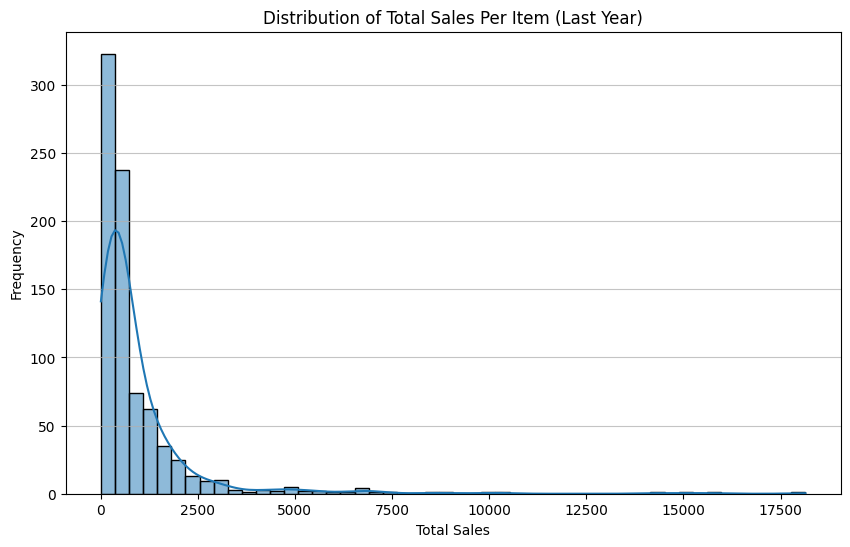

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of total sales for last year across all items
plt.figure(figsize=(10, 6))
sns.histplot(item_total_sales['sales'], bins=50, kde=True)
plt.title('Distribution of Total Sales Per Item (Last Year)')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [36]:
# Find the item with the highest total sales
highest_sales_item = item_total_sales.loc[item_total_sales['sales'].idxmax()]
highest_sales_count = highest_sales_item['sales']
highest_sales_item_id = highest_sales_item['item_id']

print(f"Highest total sales count in the last year: {highest_sales_count:.2f} for item ID: {highest_sales_item_id}")

# Find the item with the lowest total sales
lowest_sales_item = item_total_sales.loc[item_total_sales['sales'].idxmin()]
lowest_sales_count = lowest_sales_item['sales']
lowest_sales_item_id = lowest_sales_item['item_id']

print(f"Lowest total sales count in the last year: {lowest_sales_count:.2f} for item ID: {lowest_sales_item_id}")

Highest total sales count in the last year: 18139.00 for item ID: FOODS_3_090
Lowest total sales count in the last year: 7.00 for item ID: FOODS_3_345


In [37]:
# Calculate revenue by multiplying sales with sell price
food3_items_df['revenue'] = food3_items_df['sales'] * food3_items_df['sell_price']

# Filter the DataFrame to include only data from the last year (already defined as `last_year_sales_df`)
last_year_revenue_df = last_year_sales_df.copy()
last_year_revenue_df['revenue'] = last_year_revenue_df['sales'] * last_year_revenue_df['sell_price']

# Group by item_id and sum the revenue to get total revenue for each item in the last year
item_total_revenue = last_year_revenue_df.groupby('item_id')['revenue'].sum().reset_index()

# Calculate mean and standard deviation of total revenue across all items
mean_total_revenue = item_total_revenue['revenue'].mean()
std_dev_total_revenue = item_total_revenue['revenue'].std()

print(f"Mean of total revenue for last year across all items: ${mean_total_revenue:.2f}")
print(f"Standard deviation of total revenue for last year across all items: ${std_dev_total_revenue:.2f}")


Mean of total revenue for last year across all items: $2301.12
Standard deviation of total revenue for last year across all items: $4166.96


<ipython-input-37-4272278404>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food3_items_df['revenue'] = food3_items_df['sales'] * food3_items_df['sell_price']


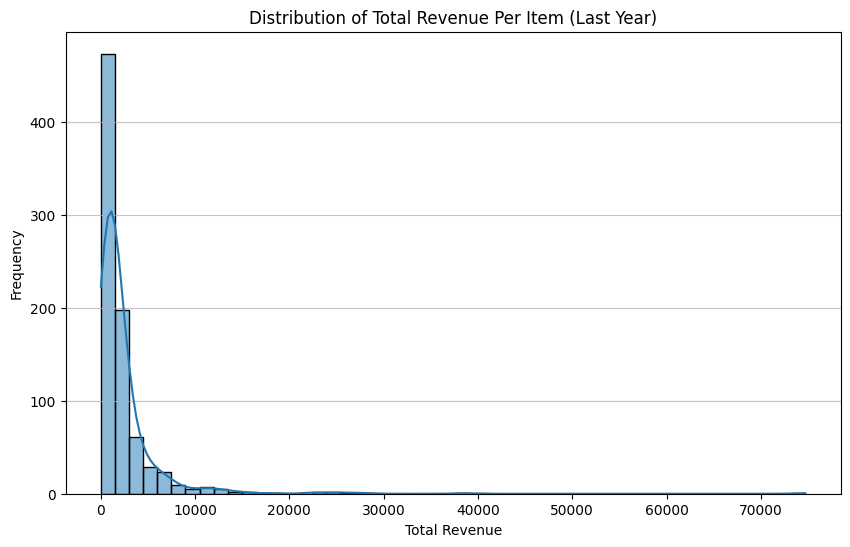

In [38]:
# Plot the distribution of total revenue for last year across all items
plt.figure(figsize=(10, 6))
sns.histplot(item_total_revenue['revenue'], bins=50, kde=True)
plt.title('Distribution of Total Revenue Per Item (Last Year)')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [39]:
# Find the item with the highest total revenue
highest_revenue_item = item_total_revenue.loc[item_total_revenue['revenue'].idxmax()]
highest_revenue_amount = highest_revenue_item['revenue']
highest_revenue_item_id = highest_revenue_item['item_id']
print(f"Highest total revenue in the last year: ${highest_revenue_amount:.2f} for item ID: {highest_revenue_item_id}")

Highest total revenue in the last year: $74724.90 for item ID: FOODS_3_120


In [40]:
# Find the item with the lowest total revenue
lowest_revenue_item = item_total_revenue.loc[item_total_revenue['revenue'].idxmin()]
lowest_revenue_amount = lowest_revenue_item['revenue']
lowest_revenue_item_id = lowest_revenue_item['item_id']

print(f"Lowest total revenue in the last year: ${lowest_revenue_amount:.2f} for item ID: {lowest_revenue_item_id}")

Lowest total revenue in the last year: $17.36 for item ID: FOODS_3_345


In [41]:
# Sort by total revenue (descending)
item_total_revenue_sorted = item_total_revenue.sort_values(by='revenue', ascending=False).reset_index(drop=True)

# Compute cumulative revenue
item_total_revenue_sorted['cumulative_revenue'] = item_total_revenue_sorted['revenue'].cumsum()

# Compute total revenue
total_revenue_overall = item_total_revenue_sorted['revenue'].sum()

# Compute cumulative revenue percentage
item_total_revenue_sorted['cumulative_revenue_percent'] = (item_total_revenue_sorted['cumulative_revenue'] / total_revenue_overall) * 100

# Create ABC categories
# Typically A: 80%, B: 15%, C: 5% but can be adjusted
def assign_abc_category(percentage):
    if percentage <= 75:
        return 'A'
    elif percentage <= 90:
        return 'B'
    else:
        return 'C'

item_total_revenue_sorted['abc_category'] = item_total_revenue_sorted['cumulative_revenue_percent'].apply(assign_abc_category)

In [42]:
print("Items sorted by total revenue with cumulative metrics and ABC categories:")
item_total_revenue_sorted.head()

Items sorted by total revenue with cumulative metrics and ABC categories:


,item_id,revenue,cumulative_revenue,cumulative_revenue_percent,abc_category
0,FOODS_3_120,74724.90,74724.90,3.945721,A
1,FOODS_3_511,38453.64,113178.54,5.976200,A
2,FOODS_3_090,27776.12,140954.66,7.442871,A
3,FOODS_3_586,26468.40,167423.06,8.840490,A
4,FOODS_3_202,25086.18,192509.24,10.165123,A


In [43]:
len(np.unique(item_total_revenue_sorted['item_id']))

823

In [44]:
print("\nABC Category distribution:")
print(item_total_revenue_sorted['abc_category'].value_counts())


ABC Category distribution:
abc_category
C    349
A    274
B    200
Name: count, dtype: int64


In [45]:
# filter the abc category, by giving threshold sales so that 10-20% of total items falls in A, 20-30% of total items falls in B and remaining in C, dont create new ABC, just using threshold change the existed category

# Recalculate thresholds based on the desired percentages of items
total_items = len(item_total_revenue_sorted)

# Define the desired percentage ranges for each category
a_percent_target = (0.10, 0.20)
b_percent_target = (0.20, 0.30)

# Calculate the target number of items for each category
a_items_target_min = int(total_items * a_percent_target[0])
a_items_target_max = int(total_items * a_percent_target[1])
b_items_target_min = int(total_items * b_percent_target[0])
b_items_target_max = int(total_items * b_percent_target[1])

print(f"Total items: {total_items}")
print(f"Target items for A: {a_items_target_min} to {a_items_target_max}")
print(f"Target items for B: {b_items_target_min} to {b_items_target_max}")


# Assign ABC categories based on the number of items
# This approach aims to put a specific number of items into each category
def assign_abc_category_by_count(row, df):
  rank = df.index.get_loc(row.name) + 1 # Get the rank (1-based)
  if rank <= a_items_target_max:
    return 'A'
  elif rank <= a_items_target_max + b_items_target_max:
    return 'B'
  else:
    return 'C'

# Apply the new categorization based on item count
item_total_revenue_sorted['abc_category'] = item_total_revenue_sorted.apply(
    assign_abc_category_by_count, axis=1, df=item_total_revenue_sorted
)


print("\nUpdated ABC Category distribution based on item count:")
print(item_total_revenue_sorted['abc_category'].value_counts())

# Verify the cumulative revenue percentages for the new categories
abc_summary = item_total_revenue_sorted.groupby('abc_category')['revenue'].sum().reset_index()
abc_summary['percentage_of_total'] = (abc_summary['revenue'] / total_revenue_overall) * 100
print("\nCumulative revenue percentage for updated ABC categories:")
abc_summary

Total items: 823
Target items for A: 82 to 164
Target items for B: 164 to 246

Updated ABC Category distribution based on item count:
abc_category
C    413
B    246
A    164
Name: count, dtype: int64

Cumulative revenue percentage for updated ABC categories:


,abc_category,revenue,percentage_of_total
0,A,1166078.47,61.572789
1,B,464897.77,24.548135
2,C,262844.87,13.879076


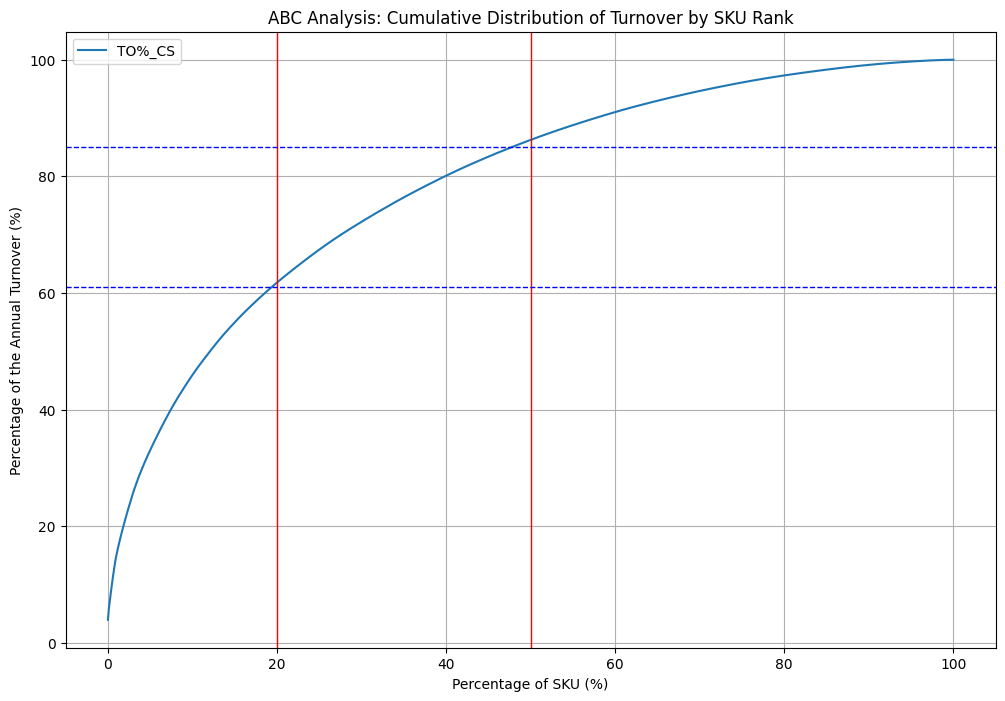

In [46]:
# Prepare data for plotting the cumulative distribution
# We need the cumulative percentage of SKUs and the cumulative percentage of Turnover
df_abc = pd.DataFrame({
    'SKU_%': np.linspace(0, 100, len(item_total_revenue_sorted)), # Percentage of SKUs
    'TO%_CS': item_total_revenue_sorted['cumulative_revenue_percent'] # Cumulative percentage of Turnover (Revenue)
})


ax = plt.gca()
df_abc.plot(figsize=(12, 8), x='SKU_%', y='TO%_CS', ax =ax, grid = True)

# Add vertical lines for SKU percentage thresholds (e.g., 20%, 50%) based on the typical analysis
ax.axvline(20 , color="red", linestyle="-", linewidth = 1.0) # End of A category items
ax.axvline(50 , color="red", linestyle="-", linewidth = 1.0) # End of B category items (20% + 30%)

# Add horizontal lines for Turnover percentage thresholds (e.g., 80%, 95%) based on the typical analysis
ax.axhline(61 , color="blue", linestyle="--", linewidth = 1.0) # End of A category Turnover
ax.axhline(85 , color="blue", linestyle="--", linewidth = 1.0) # End of B category Turnover (80% + 15%)


plt.xlabel('Percentage of SKU (%)')
plt.ylabel('Percentage of the Annual Turnover (%)')
plt.title('ABC Analysis: Cumulative Distribution of Turnover by SKU Rank')
plt.show()

In [47]:
# Group by item_id and calculate mean and standard deviation of sales for each item
item_sales_stats = last_year_sales_df.groupby('item_id')['sales'].agg(['mean', 'std']).reset_index()
item_sales_stats = item_sales_stats.rename(columns={'mean': 'mean_sales', 'std': 'std_sales'})

# Calculate the Coefficient of Variation (CV) for each item
# CV = (Standard Deviation / Mean) * 100
# Handle cases where mean sales is zero to avoid division by zero
item_sales_stats['cv'] = np.where(
    item_sales_stats['mean_sales'] == 0,
    0,  # Assign CV as 0 if mean sales is 0
    (item_sales_stats['std_sales'] / item_sales_stats['mean_sales'])
)

print("\nCoefficient of Variation of Sales for each item in the last year:")
print(item_sales_stats[['item_id', 'cv']].head())



Coefficient of Variation of Sales for each item in the last year:
       item_id        cv
0  FOODS_3_001  2.032296
1  FOODS_3_002  1.134625
2  FOODS_3_003  1.664761
3  FOODS_3_004  1.269416
4  FOODS_3_005  1.389833


In [48]:
highest_cv_items = item_sales_stats.sort_values(by='cv', ascending=False)
print("\nItems with highest Coefficient of Variation:")
print(highest_cv_items[['item_id', 'cv']].head())



Items with highest Coefficient of Variation:
         item_id        cv
439  FOODS_3_441  9.051752
343  FOODS_3_345  9.033832
151  FOODS_3_153  8.274438
520  FOODS_3_522  7.111159
628  FOODS_3_630  7.107577


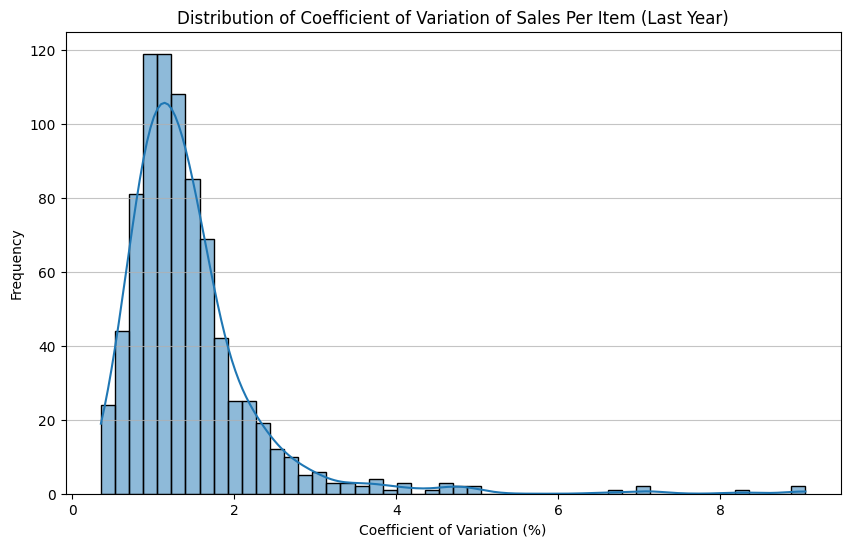

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(item_sales_stats['cv'], bins=50, kde=True)
plt.title('Distribution of Coefficient of Variation of Sales Per Item (Last Year)')
plt.xlabel('Coefficient of Variation (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

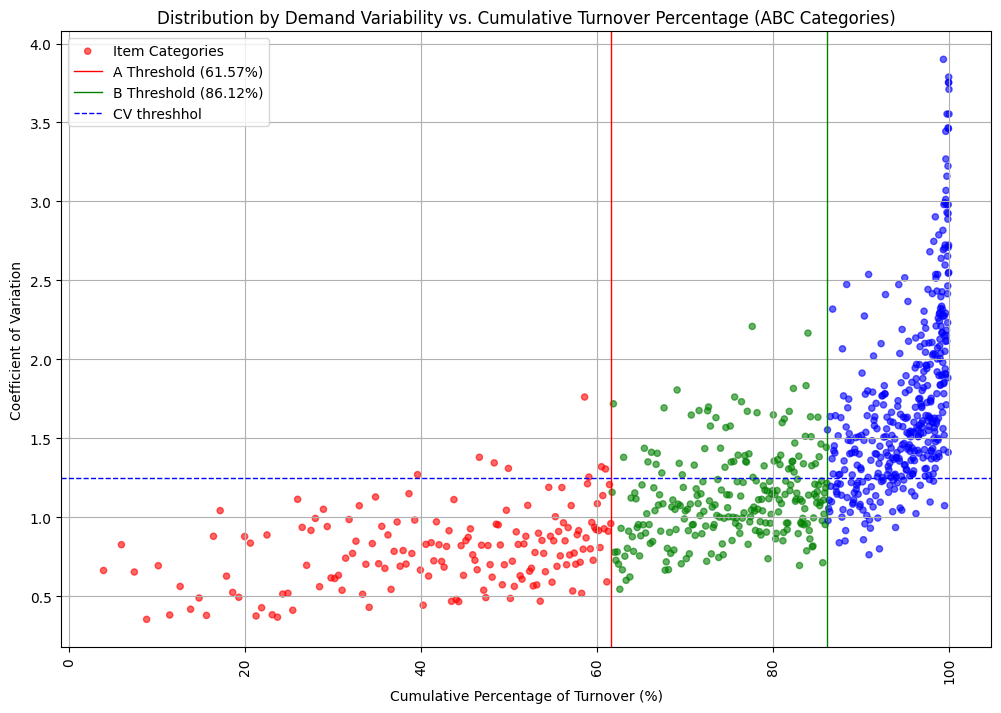

In [50]:
# Merge item_total_revenue_sorted (which has ABC categories) with item_sales_stats (which has CV)
df_plot_data = pd.merge(
    item_total_revenue_sorted[['item_id', 'cumulative_revenue_percent', 'abc_category']],
    item_sales_stats[['item_id', 'cv']],
    on='item_id',
    how='inner'
)

# Rename columns for clarity
df_plot_data = df_plot_data.rename(columns={
    'cumulative_revenue_percent': 'TO%', # Use the cumulative revenue percentage for X-axis
    'cv': 'CV' # Use the Coefficient of Variation for Y-axis
})

# Remove outliers based on CV (if necessary, adjust the threshold as needed)
df_plot_data = df_plot_data[df_plot_data['CV'] < 4].copy() # Adjusted threshold

# Prepare data for plotting the points
# We need the non-cumulative TO% per item for the scatter plot, sorted by revenue
# Let's use the individual item's contribution to total revenue as the X-axis for scatter plot
item_revenue_contribution = item_total_revenue_sorted[['item_id', 'revenue', 'abc_category']].copy()
total_revenue_for_plot = item_revenue_contribution['revenue'].sum()
item_revenue_contribution['TO%'] = (item_revenue_contribution['revenue'] / total_revenue_for_plot) * 100

# Merge with CV data
df_scatter_data = pd.merge(
    item_revenue_contribution[['item_id', 'TO%', 'abc_category']],
    item_sales_stats[['item_id', 'cv']],
    on='item_id',
    how='inner'
)
df_scatter_data = df_scatter_data.rename(columns={'cv': 'CV'})

# Remove outliers based on CV for scatter plot
df_scatter_data = df_scatter_data[df_scatter_data['CV'] < 4].copy() # Adjusted threshold

# Sort by TO% to ensure points are plotted in order
df_scatter_data = df_scatter_data.sort_values(by='TO%').reset_index(drop=True)

# Calculate cumulative TO% for plotting the cumulative line
df_scatter_data['TO%_CS'] = df_scatter_data['TO%'].cumsum()


# Create the plot
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}

# Plot the cumulative Turnover Percentage line
df_plot_data.plot(figsize=(12, 8), x='TO%', y='CV', kind='scatter',
                  color=df_plot_data['abc_category'].map(colors), ax=ax,
                  grid=True, label='Item Categories', alpha=0.6)

# Create custom legend handles
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=colors[label], label=label) for label in colors]
plt.legend(handles=handles, title='ABC Category')


# Add vertical lines for typical cumulative turnover percentage thresholds (based on your updated ABC analysis)
# These thresholds are from your output:
# A: 61.57%
# B: 24.55% (Cumulative A+B = 61.57 + 24.55 = 86.12%)
# C: 13.88% (Cumulative A+B+C = 86.12 + 13.88 = 100%)

to_a_threshold = abc_summary[abc_summary['abc_category'] == 'A']['percentage_of_total'].iloc[0]
to_b_threshold = abc_summary[abc_summary['abc_category'] == 'B']['percentage_of_total'].iloc[0]
to_c_threshold = abc_summary[abc_summary['abc_category'] == 'C']['percentage_of_total'].iloc[0]

ax.axvline(to_a_threshold , color="red",
           linestyle="-", linewidth = 1.0,
           label=f'A Threshold ({to_a_threshold:.2f}%)')
ax.axvline(to_a_threshold + to_b_threshold ,
           color="green", linestyle="-", linewidth = 1.0,
           label=f'B Threshold ({to_a_threshold + to_b_threshold:.2f}%)')

ax.axhline(1.25 , color="blue", linestyle="--", linewidth = 1.0, label=f'CV threshhol')

plt.xlabel('Cumulative Percentage of Turnover (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Distribution by Demand Variability vs. Cumulative Turnover Percentage (ABC Categories)')
plt.legend()
plt.show()


In [51]:
items_to_analyze = df_plot_data[(df_plot_data['CV'] > 1.25) & (df_plot_data['abc_category'] == 'A')]
print("Items with CV > 1.25 and ABC Category 'A':")
items_to_analyze


Items with CV > 1.25 and ABC Category 'A':


,item_id,TO%,abc_category,CV
60,FOODS_3_231,39.619234,A,1.270501
85,FOODS_3_764,46.639983,A,1.380271
92,FOODS_3_578,48.327344,A,1.344800
99,FOODS_3_676,49.939881,A,1.309930
144,FOODS_3_073,58.596881,A,1.761819
147,FOODS_3_242,59.087044,A,1.255199
156,FOODS_3_037,60.510448,A,1.320522
159,FOODS_3_110,60.971651,A,1.306050


In [52]:
len(items_to_analyze)

8

In [53]:
# Sort the items by CV in descending order
items_to_analyze_sorted_by_cv = items_to_analyze.sort_values(by='CV', ascending=False)

# Take the top 3 items
top_3_items_by_cv = items_to_analyze_sorted_by_cv.head(3)

# Filter foods3_item_df to keep only the rows corresponding to these top 3 item_ids
top_3_items_df = food3_items_df[food3_items_df['item_id'].isin(top_3_items_by_cv['item_id'])]

print("Top 3 Items from the analysis (sorted by CV) and their data from foods3_item_df:")
top_3_items_df

Top 3 Items from the analysis (sorted by CV) and their data from foods3_item_df:


,id,item_id,dept_id,store_id,d,sales,date,wm_yr_wk,wday,month,year,event_type_1,sell_price,revenue
1330614,FOODS_3_073_CA_1_evaluation,FOODS_3_073,FOODS_3,CA_1,d_1030,0,2013-11-23,11344,1,11,2013,Weekend,2.98,0.00
1330615,FOODS_3_073_CA_1_evaluation,FOODS_3_073,FOODS_3,CA_1,d_1031,0,2013-11-24,11344,2,11,2013,Weekend,2.98,0.00
1330616,FOODS_3_073_CA_1_evaluation,FOODS_3_073,FOODS_3,CA_1,d_1032,11,2013-11-25,11344,3,11,2013,Weekday,2.98,32.78
1330617,FOODS_3_073_CA_1_evaluation,FOODS_3_073,FOODS_3,CA_1,d_1033,3,2013-11-26,11344,4,11,2013,Weekday,2.98,8.94
1330618,FOODS_3_073_CA_1_evaluation,FOODS_3_073,FOODS_3,CA_1,d_1034,13,2013-11-27,11344,5,11,2013,Weekday,2.98,38.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666929,FOODS_3_764_CA_1_evaluation,FOODS_3_764,FOODS_3,CA_1,d_1937,7,2016-05-18,11616,5,5,2016,Weekday,2.98,20.86
2666930,FOODS_3_764_CA_1_evaluation,FOODS_3_764,FOODS_3,CA_1,d_1938,10,2016-05-19,11616,6,5,2016,Weekday,2.98,29.80
2666931,FOODS_3_764_CA_1_evaluation,FOODS_3_764,FOODS_3,CA_1,d_1939,17,2016-05-20,11616,7,5,2016,Weekday,2.98,50.66
2666932,FOODS_3_764_CA_1_evaluation,FOODS_3_764,FOODS_3,CA_1,d_1940,10,2016-05-21,11617,1,5,2016,Weekend,2.98,29.80


In [54]:
def analyze_month_and_daytype_trends(merged_df):
    # Add 'year' and 'month' columns
    merged_df['year'] = merged_df['date'].dt.year
    merged_df['month'] = merged_df['date'].dt.month

    for item in np.unique(merged_df['item_id']):
       print(f"\n📊 Analyzing: {item}")

      # Filter the dataframe for the current item
       group = merged_df[merged_df['item_id'] == item].copy()

      # --- Monthly Trend ---
       month_sales = group.groupby(['year', 'month'])['sales'].sum().reset_index()

       plt.figure(figsize=(10,5))
       colors = plt.cm.tab10.colors  # Different colors

       for idx, year in enumerate(sorted(month_sales['year'].unique())):
          data = month_sales[month_sales['year'] == year]
          plt.plot(data['month'], data['sales'], marker='o', color=colors[idx % 10], label=str(year))

       plt.title(f"Monthly Demand Trend:")
       plt.xlabel("Month")
       plt.ylabel("Total Sales")
       plt.grid(True)
       plt.xticks(range(1,13))  # 1 to 12 months
       plt.legend(title='Year')
       plt.show()

      # --- Weekday/Weekend/Others Trend ---
       daytype_sales = group.groupby('event_type_1')['sales'].mean().sort_values(ascending=False)

       print("🔥 Mean Sales by Day Type (Weekday/Weekend/Others):")
       print(daytype_sales)

       daytype_sales.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], figsize=(8,4), title=f"Day Type Impact:")
       plt.ylabel("Avg Sales")
       plt.xlabel("Day Type")
       plt.grid(True)
       plt.show()


📊 Analyzing: FOODS_3_073


<ipython-input-54-3316705089>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['year'] = merged_df['date'].dt.year
<ipython-input-54-3316705089>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['month'] = merged_df['date'].dt.month


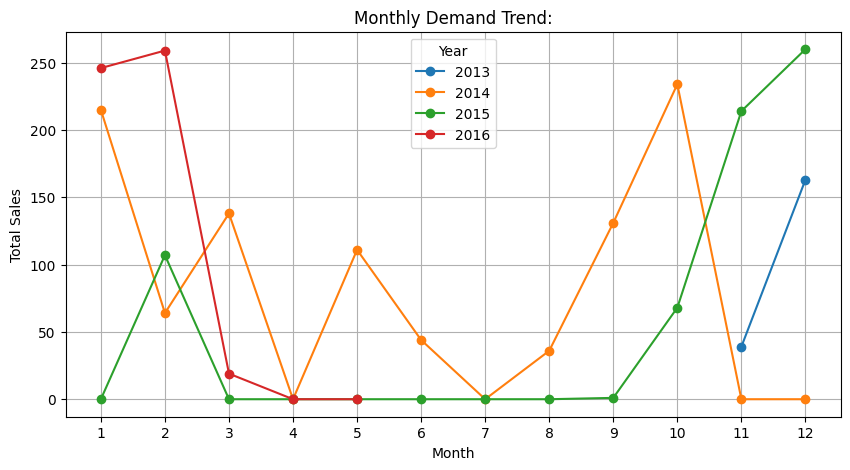

🔥 Mean Sales by Day Type (Weekday/Weekend/Others):
event_type_1
Sporting/Weekend     7.750000
Religious/Weekend    5.875000
National             3.708333
Weekend              3.585774
Religious            2.500000
Sporting             2.333333
Weekday              2.087102
Cultural/Weekend     2.000000
Cultural             0.875000
National/Weekend     0.000000
Name: sales, dtype: float64


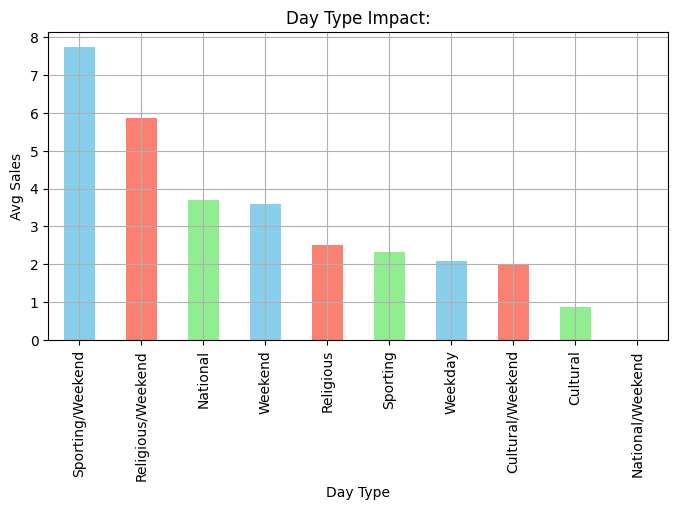


📊 Analyzing: FOODS_3_578


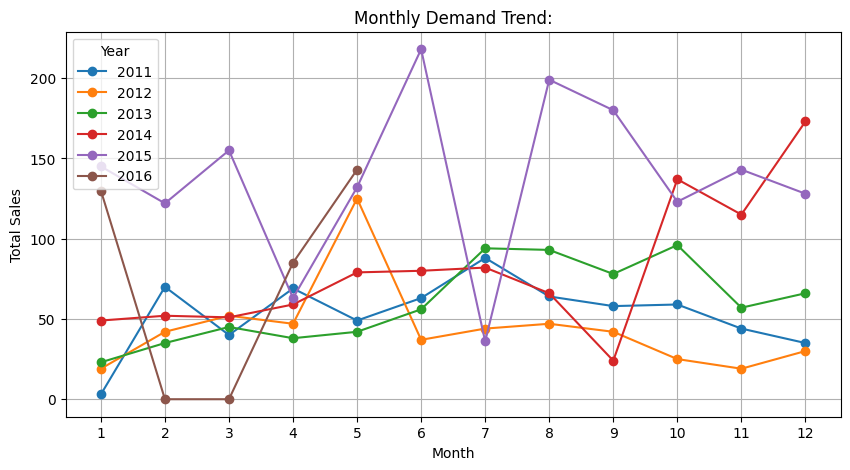

🔥 Mean Sales by Day Type (Weekday/Weekend/Others):
event_type_1
Religious/Weekend    4.000000
National/Weekend     3.500000
Cultural/Weekend     3.190476
Weekend              3.158103
Sporting/Weekend     3.000000
Cultural             2.687500
Religious            2.351351
National             2.319149
Weekday              2.223962
Sporting             1.625000
Name: sales, dtype: float64


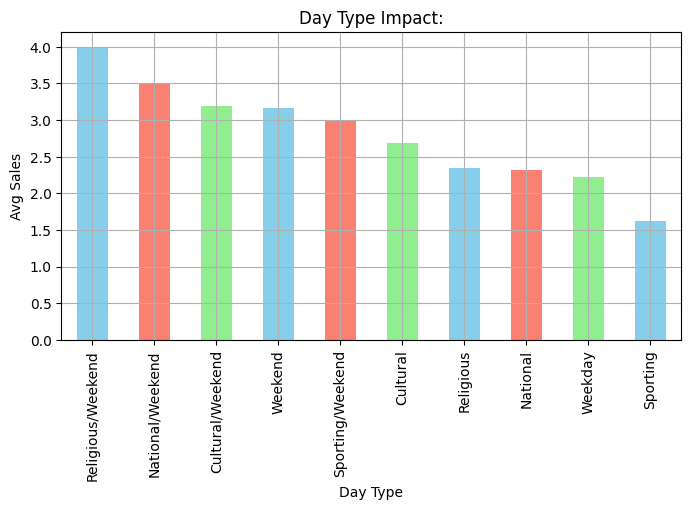


📊 Analyzing: FOODS_3_764


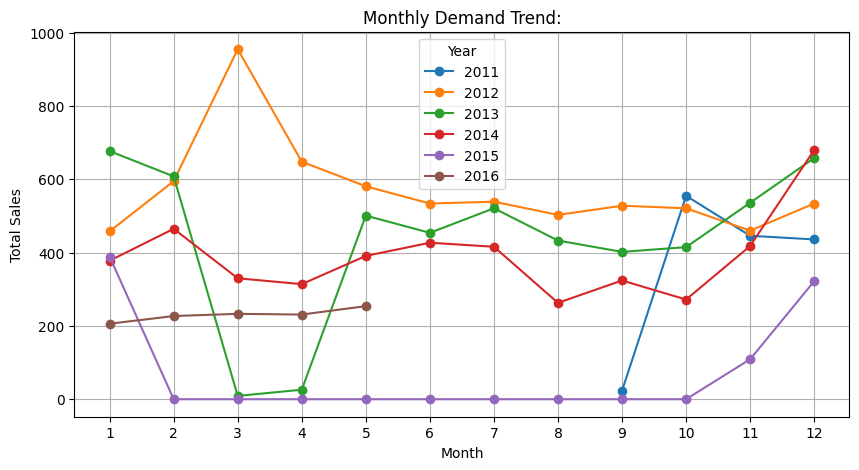

🔥 Mean Sales by Day Type (Weekday/Weekend/Others):
event_type_1
Weekend              15.761261
Sporting/Weekend     15.333333
Religious/Weekend    14.666667
Cultural/Weekend     11.578947
Religious            11.562500
National             10.744186
Weekday              10.405357
National/Weekend      8.500000
Cultural              7.923077
Sporting              7.428571
Name: sales, dtype: float64


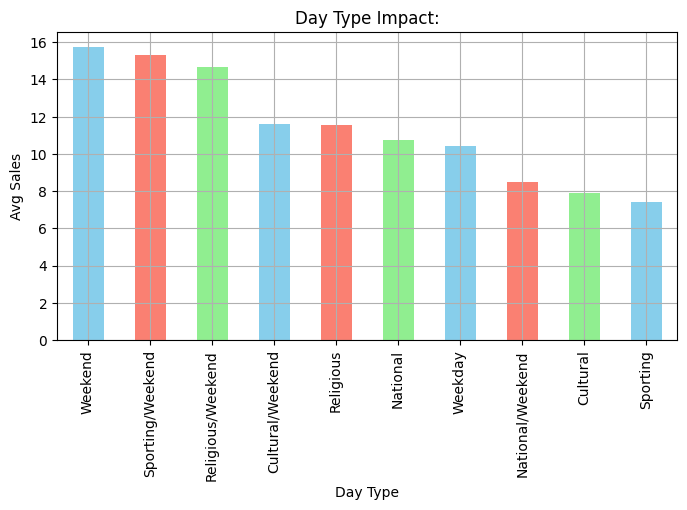

In [55]:
analyze_month_and_daytype_trends(top_3_items_df)

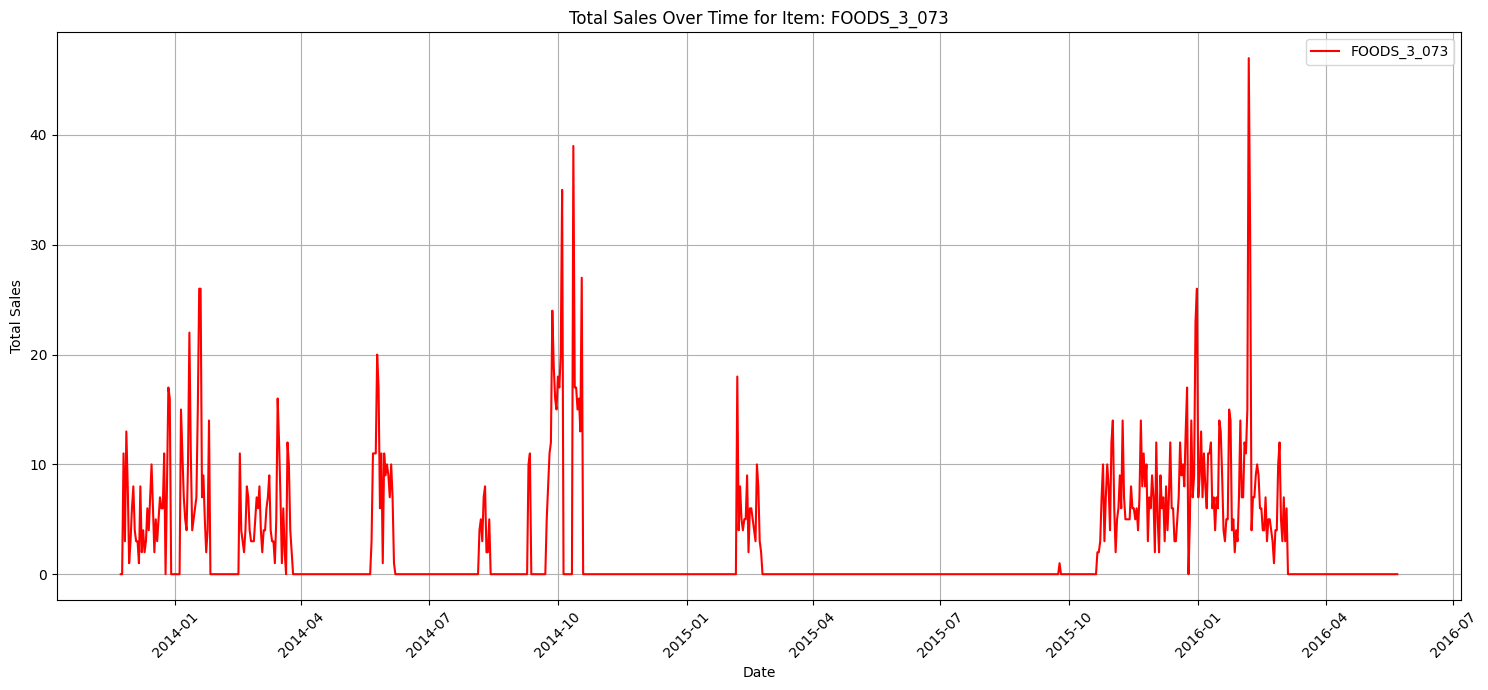

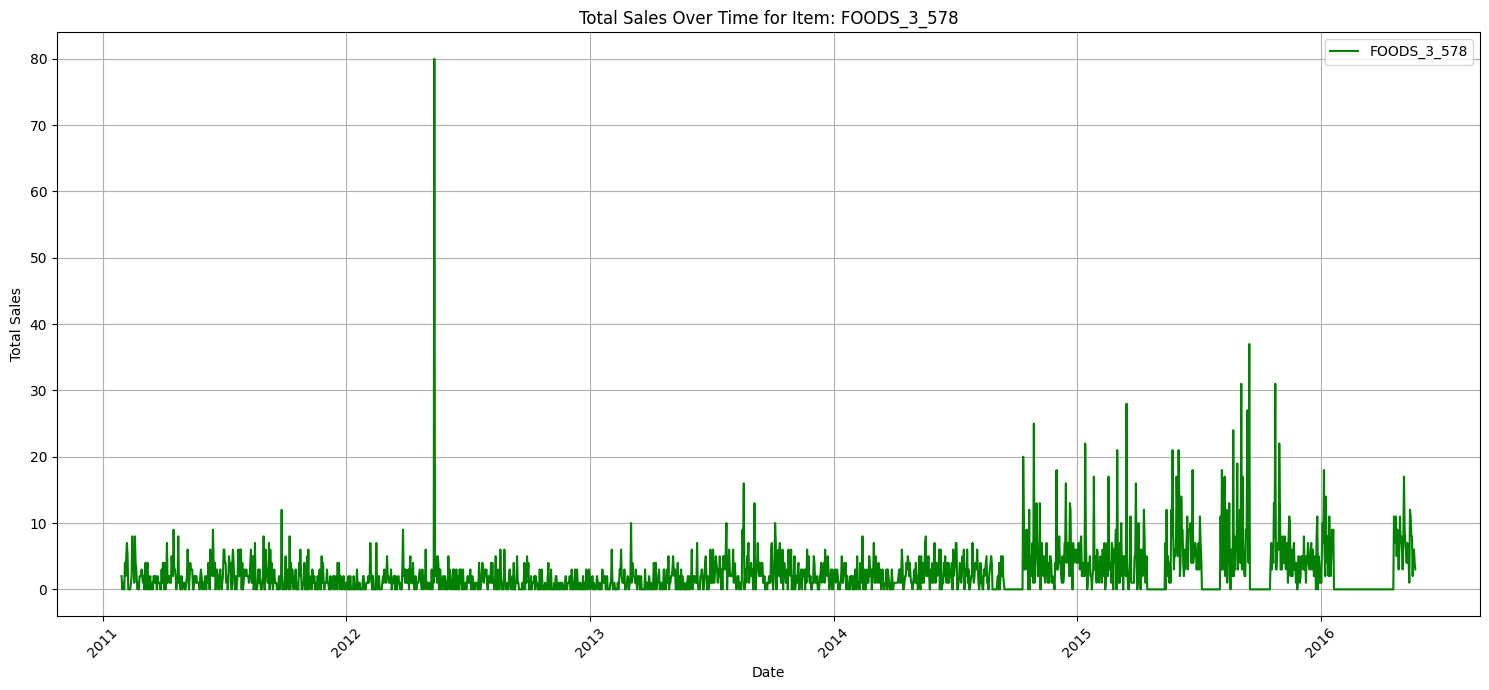

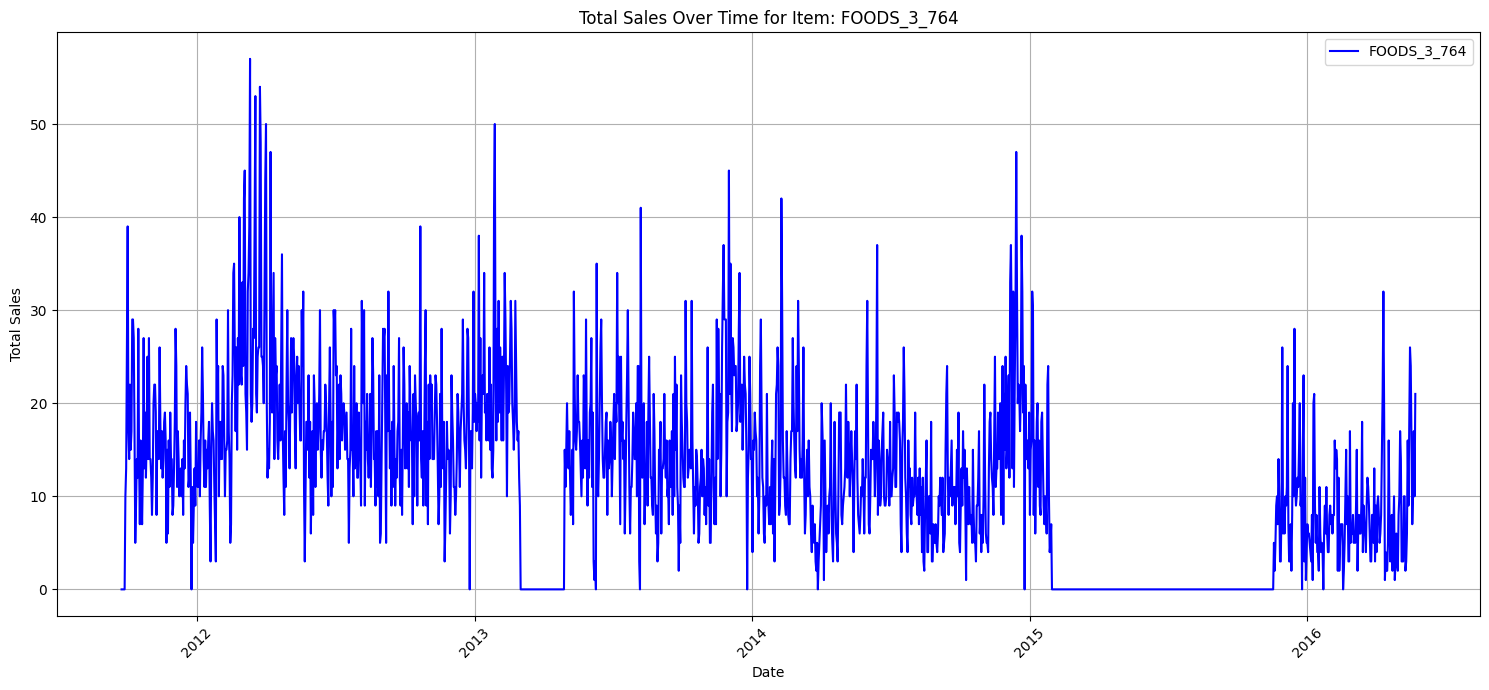

In [56]:
# Get the unique item IDs from the top 3 items
top_item_ids = top_3_items_df['item_id'].unique()

# Define a list of colors for the plots
colors = ['red', 'green', 'blue']

# Loop through each item ID
for i, item_id in enumerate(top_item_ids):
  # Filter the DataFrame for the current item
  item_df = top_3_items_df[top_3_items_df['item_id'] == item_id].copy()

  # Group by date and sum the sales
  daily_sales = item_df.groupby('date')['sales'].sum().reset_index()

  # Plot the daily sales over time
  plt.figure(figsize=(15, 7))
  plt.plot(daily_sales['date'], daily_sales['sales'], label=item_id, color=colors[i % len(colors)])

  plt.title(f'Total Sales Over Time for Item: {item_id}')
  plt.xlabel('Date')
  plt.ylabel('Total Sales')
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.legend()
  plt.show()

<ipython-input-57-2120568286>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  item_food3_578_monthly_sales = item_food3_578_daily_sales.resample('M').sum()


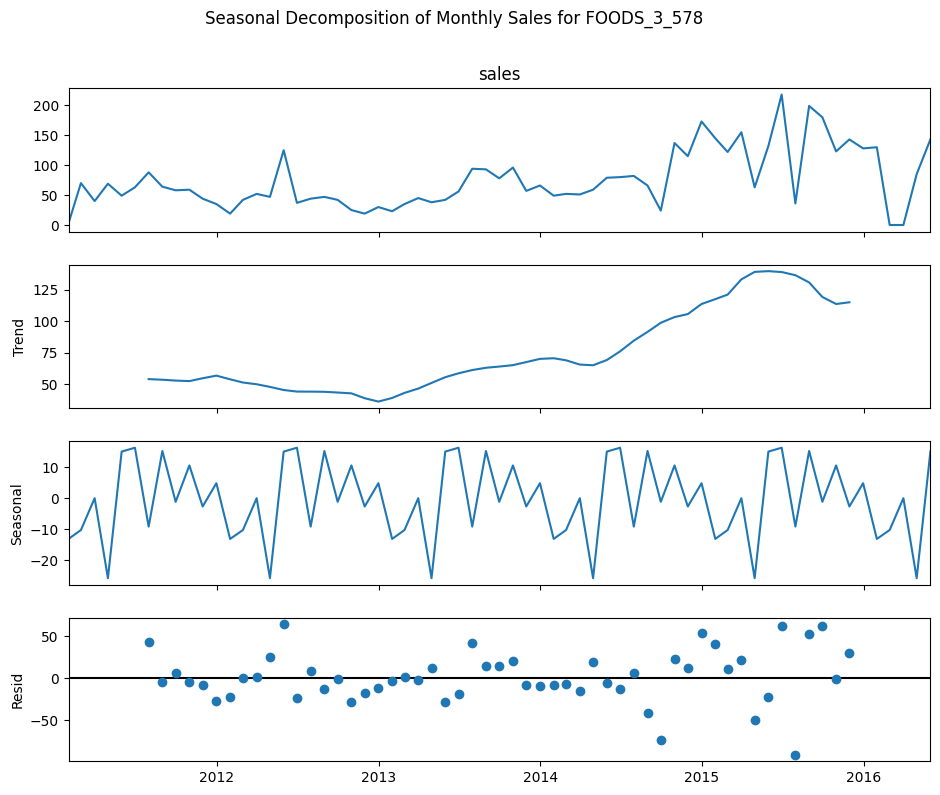


Trend Component:
date
2011-07-31    54.166667
2011-08-31    53.666667
2011-09-30    53.000000
2011-10-31    52.583333
2011-11-30    54.833333
Freq: ME, Name: trend, dtype: float64
date
2015-07-31    136.375000
2015-08-31    130.666667
2015-09-30    119.125000
2015-10-31    113.583333
2015-11-30    114.958333
Freq: ME, Name: trend, dtype: float64

Seasonal Component (First 24 values - two periods):
date
2011-01-31   -13.185417
2011-02-28   -10.300000
2011-03-31     0.022917
2011-04-30   -25.914583
2011-05-31    15.137500
2011-06-30    16.387500
2011-07-31    -9.193750
2011-08-31    15.331250
2011-09-30    -1.152083
2011-10-31    10.647917
2011-11-30    -2.668750
2011-12-31     4.887500
2012-01-31   -13.185417
2012-02-29   -10.300000
2012-03-31     0.022917
2012-04-30   -25.914583
2012-05-31    15.137500
2012-06-30    16.387500
2012-07-31    -9.193750
2012-08-31    15.331250
2012-09-30    -1.152083
2012-10-31    10.647917
2012-11-30    -2.668750
2012-12-31     4.887500
Freq: ME, Name: s

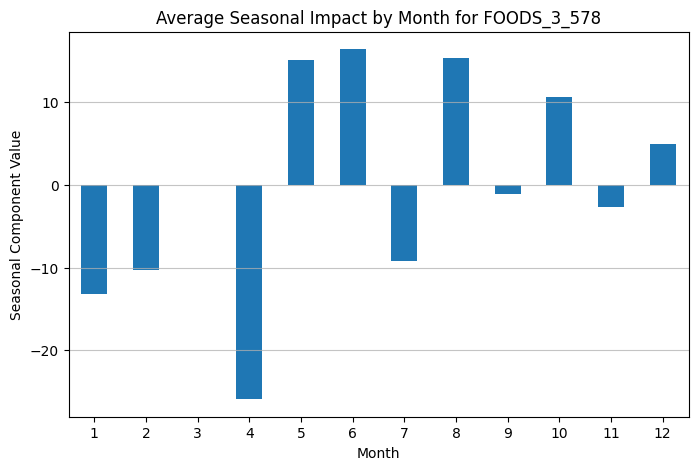

In [57]:
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Select the item 'FOODS_3_073'
item_food3_578_df = top_3_items_df[top_3_items_df['item_id'] == 'FOODS_3_578'].copy()

# Group by date and sum the sales to get a time series
item_food3_578_daily_sales = item_food3_578_df.groupby('date')['sales'].sum().reset_index()

# Set the 'date' column as the index for the time series
item_food3_578_daily_sales = item_food3_578_daily_sales.set_index('date')

# Let's try decomposing with a period of 30 for daily data first to see monthly patterns.
# Note: For true monthly seasonality, aggregating to monthly sales is more appropriate.
# Let's aggregate to monthly sales first.

item_food3_578_monthly_sales = item_food3_578_daily_sales.resample('M').sum()

# Perform seasonal decomposition on the monthly aggregated data
# We expect seasonality to be yearly for monthly data, so period = 12
decomposition = seasonal_decompose(item_food3_578_monthly_sales['sales'], model='additive', period=12)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Seasonal Decomposition of Monthly Sales for FOODS_3_578', y=1.02)
plt.show()

# Analyze the Trend component:
# Look at the trend plot to see if it's generally increasing, decreasing, or stable over time.
trend = decomposition.trend
print("\nTrend Component:")
print(trend.dropna().head())
print(trend.dropna().tail())

# Analyze the Seasonal component:
# Look at the seasonal plot to see the recurring patterns within a period (yearly for monthly data).
# The plot will show the seasonal effect for each month across the years.
seasonal = decomposition.seasonal
print("\nSeasonal Component (First 24 values - two periods):")
print(seasonal.head(24))

# Analyze the Residual component:
# The residual component is the remaining variation after removing trend and seasonality.
residual = decomposition.resid
print("\nResidual Component:")
print(residual.dropna().head())
print(residual.dropna().tail())

# To specifically understand seasonality per month:
# The seasonal component plot directly shows the average seasonal effect for each month.
# You can also group the seasonal component by month if needed, but the plot is often sufficient.

print("\nSummary of Trend Analysis:")
# Visually inspect the trend plot from the decomposition.
# You can also look at the difference between the last and first trend value.
if trend.first_valid_index() is not None and trend.last_valid_index() is not None:
    first_trend = trend.loc[trend.first_valid_index()]
    last_trend = trend.loc[trend.last_valid_index()]
    trend_change = last_trend - first_trend
    print(f"Change in trend component from start to end: {trend_change:.2f}")

    if trend_change > 0:
        print("Overall trend appears to be increasing.")
    elif trend_change < 0:
        print("Overall trend appears to be decreasing.")
    else:
        print("Overall trend appears to be relatively stable.")
else:
    print("Trend component could not be calculated (likely due to short time series).")


print("\nSummary of Seasonality Analysis per Month:")
# The seasonal plot is the best way to see this.
# You can also calculate the average seasonal component for each month.
if seasonal.first_valid_index() is not None:
    monthly_seasonal_impact = seasonal.groupby(seasonal.index.month).mean()
    print("Average Seasonal Impact per Month:")
    print(monthly_seasonal_impact)
    # Plot the monthly seasonal impact
    plt.figure(figsize=(8, 5))
    monthly_seasonal_impact.plot(kind='bar')
    plt.title('Average Seasonal Impact by Month for FOODS_3_578')
    plt.xlabel('Month')
    plt.ylabel('Seasonal Component Value')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Interpret the plot and monthly_seasonal_impact values:
    # Positive values indicate months with sales higher than the trend.
    # Negative values indicate months with sales lower than the trend.
    # Larger absolute values indicate stronger seasonality.
else:
    print("Seasonal component could not be calculated (likely due to short time series).")

In [58]:
# Select the item 'FOODS_3_578'
item_food3_578_df_sarima = top_3_items_df[top_3_items_df['item_id'] == 'FOODS_3_578'].copy()

# Ensure date column is datetime type
item_food3_578_df_sarima['date'] = pd.to_datetime(item_food3_578_df_sarima['date'])

# Sort by date
item_food3_578_df_sarima = item_food3_578_df_sarima.sort_values('date')

# Create dummy variables for event_type_1
event_dummies = pd.get_dummies(item_food3_578_df_sarima['event_type_1'], prefix='event',dtype=int)

# Concatenate the dummy variables to the main dataframe
item_food3_578_df_sarima = pd.concat([item_food3_578_df_sarima, event_dummies], axis=1)

# Display the first few rows to check the new dummy columns
print("DataFrame with dummy variables for event_type_1:")
item_food3_578_df_sarima.head()

DataFrame with dummy variables for event_type_1:


,id,item_id,dept_id,store_id,d,sales,date,wm_yr_wk,wday,month,...,event_Cultural,event_Cultural/Weekend,event_National,event_National/Weekend,event_Religious,event_Religious/Weekend,event_Sporting,event_Sporting/Weekend,event_Weekday,event_Weekend
2309790,FOODS_3_578_CA_1_evaluation,FOODS_3_578,FOODS_3,CA_1,d_1,2,2011-01-29,11101,1,1,...,0,0,0,0,0,0,0,0,0,1
2309791,FOODS_3_578_CA_1_evaluation,FOODS_3_578,FOODS_3,CA_1,d_2,0,2011-01-30,11101,2,1,...,0,0,0,0,0,0,0,0,0,1
2309792,FOODS_3_578_CA_1_evaluation,FOODS_3_578,FOODS_3,CA_1,d_3,1,2011-01-31,11101,3,1,...,0,0,0,0,0,0,0,0,1,0
2309793,FOODS_3_578_CA_1_evaluation,FOODS_3_578,FOODS_3,CA_1,d_4,1,2011-02-01,11101,4,2,...,0,0,0,0,0,0,0,0,1,0
2309794,FOODS_3_578_CA_1_evaluation,FOODS_3_578,FOODS_3,CA_1,d_5,0,2011-02-02,11101,5,2,...,0,0,0,0,0,0,0,0,1,0


In [59]:
# Group by date and sum sales, and take the mode/first of dummy variables
# This assumes that for a given date, all rows for this specific item have the same event type
# If an item has multiple event types on the same day (which is unlikely based on calendar structure),
# this aggregation might need adjustment. For SARIMA, we need a single row per time step (day).
item_food3_578_daily_ts = item_food3_578_df_sarima.groupby('date').agg({
    'sales': 'sum',
    **{col: 'max' for col in event_dummies.columns} # Assuming event dummies are 0/1
}).reset_index()

# Set the date as index
item_food3_578_daily_ts = item_food3_578_daily_ts.set_index('date')

# Display the time series data with dummies
print("\nDaily Time Series data with Event Dummy Variables:")
item_food3_578_daily_ts.head()


Daily Time Series data with Event Dummy Variables:


,sales,event_Cultural,event_Cultural/Weekend,event_National,event_National/Weekend,event_Religious,event_Religious/Weekend,event_Sporting,event_Sporting/Weekend,event_Weekday,event_Weekend
date,,,,,,,,,,,
2011-01-29,2,0,0,0,0,0,0,0,0,0,1
2011-01-30,0,0,0,0,0,0,0,0,0,0,1
2011-01-31,1,0,0,0,0,0,0,0,0,1,0
2011-02-01,1,0,0,0,0,0,0,0,0,1,0
2011-02-02,0,0,0,0,0,0,0,0,0,1,0


Training data shape: (1798, 11)
Testing data shape: (143, 11)

Fitting SARIMA model...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model fitting complete.
                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                 1798
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -4815.556
Date:                           Fri, 13 Jun 2025   AIC                           9661.111
Time:                                   16:43:51   BIC                           9743.385
Sample:                               01-29-2011   HQIC                          9691.498
                                    - 12-31-2015                                         
Covariance Type:                             opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
event_Cultural              0.2761   2.03e+04   1.36e-05      1.0

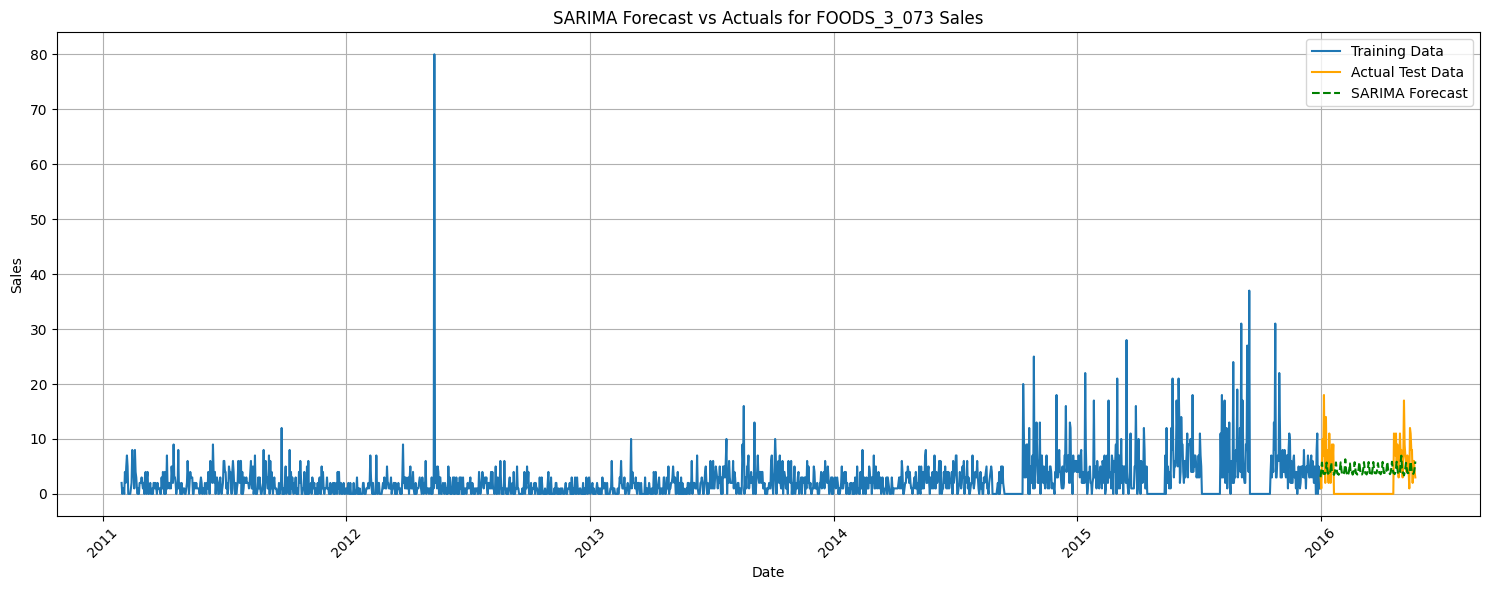

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the cutoff date for the training data (up to the end of 2015)
train_cutoff_date = '2015-12-31'

# Split the data into training and testing sets
train_data = item_food3_578_daily_ts[item_food3_578_daily_ts.index <= train_cutoff_date].copy()
test_data = item_food3_578_daily_ts[item_food3_578_daily_ts.index > train_cutoff_date].copy()

print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Define the exogenous variables (event dummies) for the training data
exog_train = train_data[event_dummies.columns]

# Define the SARIMA order (p, d, q) and seasonal order (P, D, Q, S)
# Let's try a simpler seasonal period, maybe weekly (S=7).
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7) # (P, D, Q, S=weekly seasonality)

print("\nFitting SARIMA model...")
try:
    model = SARIMAX(train_data['sales'],
                    exog=exog_train,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    sarima_results = model.fit(disp=False) # Set disp=False to suppress convergence output

    print("SARIMA model fitting complete.")
    print(sarima_results.summary())

except Exception as e:
    print(f"Error fitting SARIMA model: {e}")
    sarima_results = None

# You can now use sarima_results to make predictions if the model fitted successfully.
# For forecasting the test data, you would need the exogenous variables for the test period.
if sarima_results:
    exog_test = test_data[event_dummies.columns]
    try:
        # Forecast sales for the test period
        forecast_steps = len(test_data)
        sarima_forecast = sarima_results.forecast(steps=forecast_steps, exog=exog_test)

        # The forecast includes the index from the training data extended by the number of steps
        # Re-index the forecast to match the test data index
        sarima_forecast.index = test_data.index

        print("\nSARIMA Forecast for the test period:")
        print(sarima_forecast.head())
        print("...")
        print(sarima_forecast.tail())

        # Plot the training data, actual test data, and forecast
        plt.figure(figsize=(15, 6))
        plt.plot(train_data.index, train_data['sales'], label='Training Data')
        plt.plot(test_data.index, test_data['sales'], label='Actual Test Data', color='orange')
        plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', color='green', linestyle='--')

        plt.title('SARIMA Forecast vs Actuals for FOODS_3_073 Sales')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error during forecasting: {e}")

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

if sarima_results and 'sarima_forecast' in locals():
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(test_data['sales'], sarima_forecast))
    mae = mean_absolute_error(test_data['sales'], sarima_forecast)

    print(f"\nEvaluation Metrics for SARIMA Forecast:")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")

    # You can add other metrics like Mean Absolute Percentage Error (MAPE)
    # Note: MAPE can be problematic with zero actual values. Handle zeros if necessary.
    def mean_absolute_percentage_error(y_true, y_pred):
        # Avoid division by zero
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Calculate MAPE, handling cases where actual sales are zero
    # Replace 0s in y_true with a very small number or filter them out
    y_true_no_zeros = test_data['sales'][test_data['sales'] != 0]
    y_pred_corresponding = sarima_forecast[test_data['sales'] != 0]

    if len(y_true_no_zeros) > 0:
      mape = mean_absolute_percentage_error(y_true_no_zeros, y_pred_corresponding)
      print(f"Mean Absolute Percentage Error (MAPE) (excluding zeros): {mape:.2f}%")
    else:
      print("Cannot calculate MAPE as there are no non-zero actual sales in the test set.")

else:
    print("\nSARIMA model results or forecast not available for evaluation.")


Evaluation Metrics for SARIMA Forecast:
Root Mean Squared Error (RMSE): 4.41
Mean Absolute Error (MAE): 3.92
Mean Absolute Percentage Error (MAPE) (excluding zeros): 54.34%


In [62]:
from sklearn.metrics import r2_score

if sarima_results and 'sarima_forecast' in locals():
  # Calculate R2 score
  r2 = r2_score(test_data['sales'], sarima_forecast)
  print(f"R2 Score: {r2:.2f}")

R2 Score: -0.24


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93fbo0yc/21hzicck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93fbo0yc/p0tam1va.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77267', 'data', 'file=/tmp/tmp93fbo0yc/21hzicck.json', 'init=/tmp/tmp93fbo0yc/p0tam1va.json', 'output', 'file=/tmp/tmp93fbo0yc/prophet_modelr58thsqu/prophet_model-20250613164354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:43:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Prophet-ready Time Series data:
          ds  y
0 2011-01-29  2
1 2011-01-30  0
2 2011-01-31  1
3 2011-02-01  1
4 2011-02-02  0
             ds  y
1936 2016-05-18  2
1937 2016-05-19  6
1938 2016-05-20  6
1939 2016-05-21  4
1940 2016-05-22  3
Training data shape for Prophet: (1798, 2)
Testing data shape for Prophet: (143, 2)

Initializing and fitting Prophet model...


16:43:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet model fitting complete.

Future dataframe for forecasting:
          ds
0 2011-01-29
1 2011-01-30
2 2011-01-31
3 2011-02-01
4 2011-02-02
             ds
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

Making predictions with Prophet...
Prophet forecasting complete.
Prophet Forecast (first 5 rows):
          ds      yhat  yhat_lower  yhat_upper
0 2011-01-29  2.089665   -2.496726    6.416675
1 2011-01-30  2.562405   -1.955486    6.951719
2 2011-01-31  1.826962   -2.865136    6.426379
3 2011-02-01  1.214598   -3.230029    5.557172
4 2011-02-02  1.254938   -3.375740    5.743912
...
Prophet Forecast (last 5 rows):
             ds      yhat  yhat_lower  yhat_upper
1936 2016-05-18  6.219534    1.662129   10.641752
1937 2016-05-19  6.011006    1.792467   10.595793
1938 2016-05-20  6.295469    1.859060   11.030576
1939 2016-05-21  7.153090    2.756037   11.916332
1940 2016-05-22  7.616242    3.232972   12.232266

Evaluation DataFrame head:
          ds  

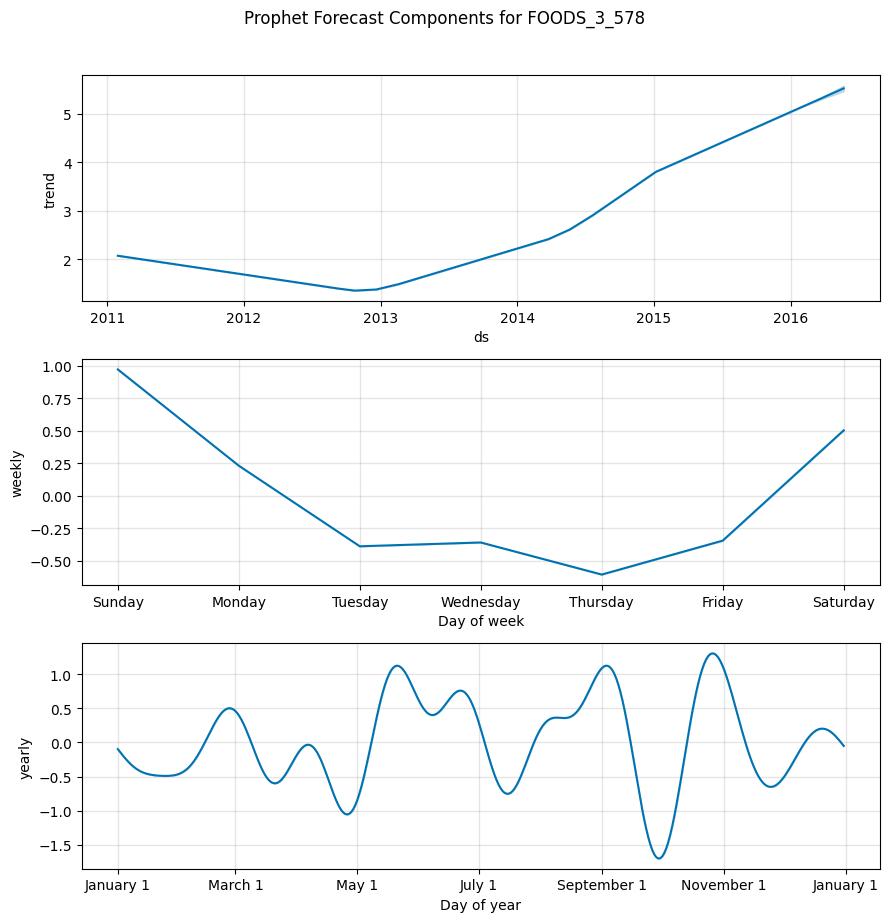

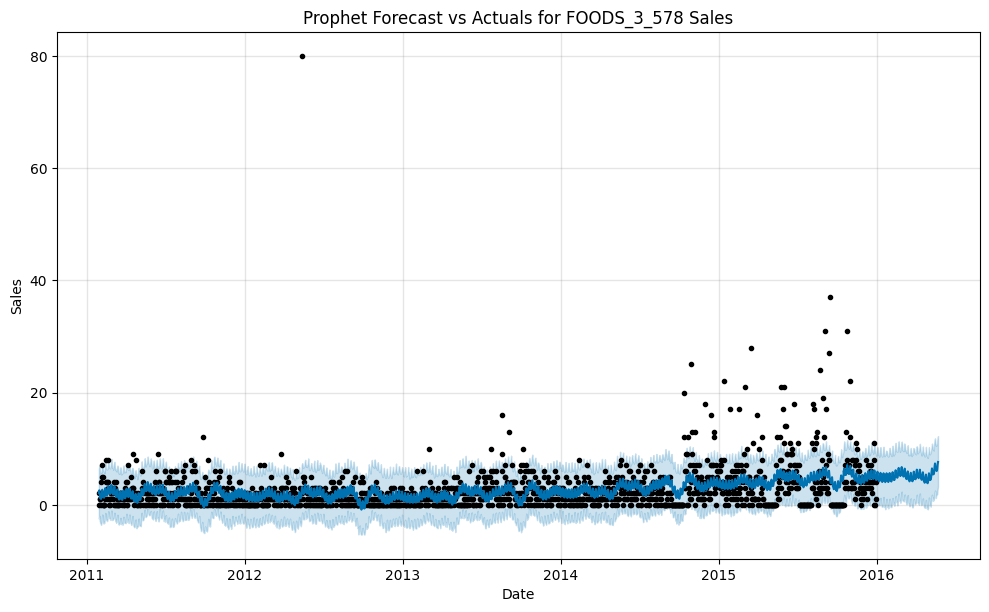

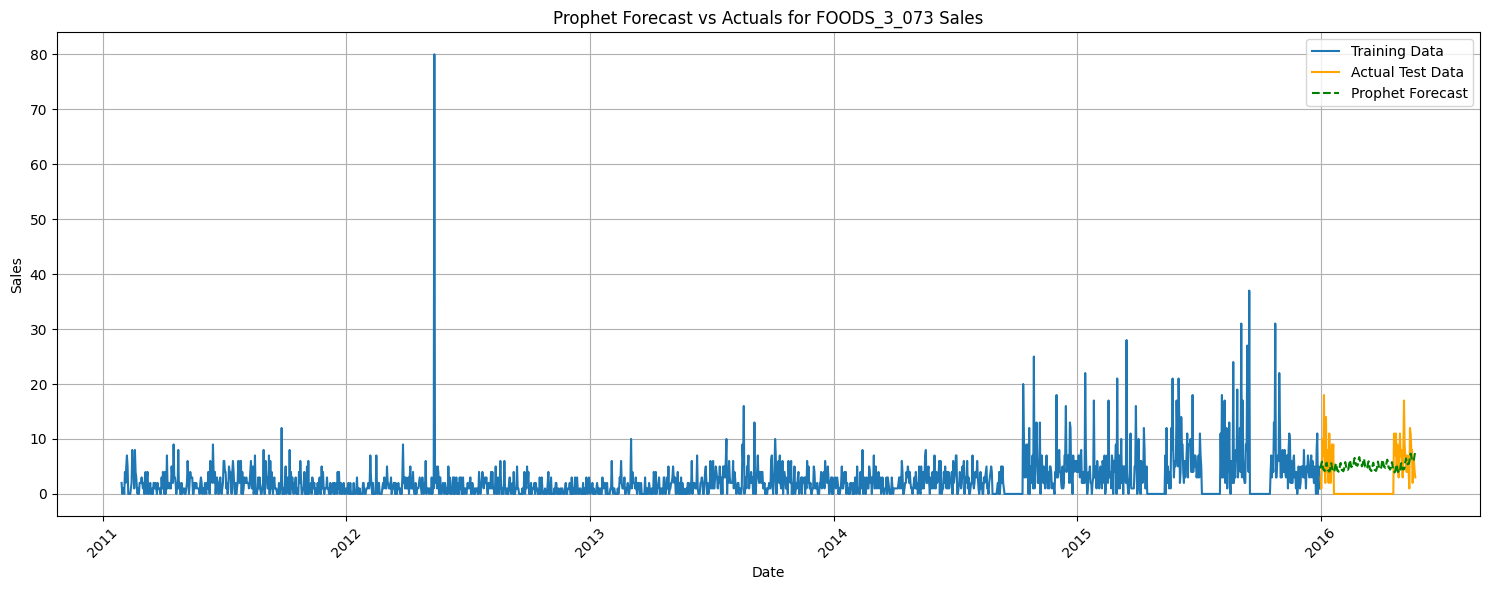

In [63]:
!pip install prophet
from prophet import Prophet

# Select the item 'FOODS_3_578'
item_food3_578_df_prophet = top_3_items_df[top_3_items_df['item_id'] == 'FOODS_3_578'].copy()

# Group by date and sum the sales to get a time series
item_food3_578_daily_ts_prophet = item_food3_578_df_prophet.groupby('date')['sales'].sum().reset_index()
item_food3_578_daily_ts_prophet = item_food3_578_daily_ts_prophet.rename(columns={'date': 'ds', 'sales': 'y'})

# Ensure 'ds' is a datetime object
item_food3_578_daily_ts_prophet['ds'] = pd.to_datetime(item_food3_578_daily_ts_prophet['ds'])

print("Prophet-ready Time Series data:")
print(item_food3_578_daily_ts_prophet.head())
print(item_food3_578_daily_ts_prophet.tail())

# Define the cutoff date for the training data (up to the end of 2015)
train_cutoff_date_prophet = '2015-12-31'

# Split the data into training and testing sets
train_data_prophet = item_food3_578_daily_ts_prophet[item_food3_578_daily_ts_prophet['ds'] <= train_cutoff_date_prophet].copy()
test_data_prophet = item_food3_578_daily_ts_prophet[item_food3_578_daily_ts_prophet['ds'] > train_cutoff_date_prophet].copy()

print(f"Training data shape for Prophet: {train_data_prophet.shape}")
print(f"Testing data shape for Prophet: {test_data_prophet.shape}")

# Let's add weekly seasonality explicitly. Prophet automatically detects yearly seasonality if data spans multiple years.
print("\nInitializing and fitting Prophet model...")
model_prophet = Prophet(
    weekly_seasonality=True,
    yearly_seasonality=True, # Let Prophet detect yearly seasonality
    seasonality_mode='additive' # Or 'multiplicative' if seasonality scales with trend
)

# Fit the model on the training data
model_prophet.fit(train_data_prophet)

print("Prophet model fitting complete.")

# Create a future dataframe for forecasting
# We need to specify the number of future periods to forecast
future_prophet = model_prophet.make_future_dataframe(periods=len(test_data_prophet), freq='D')

print("\nFuture dataframe for forecasting:")
print(future_prophet.head())
print(future_prophet.tail())

# Make predictions
print("\nMaking predictions with Prophet...")
forecast_prophet = model_prophet.predict(future_prophet)

print("Prophet forecasting complete.")
print("Prophet Forecast (first 5 rows):")
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
print("...")
print("Prophet Forecast (last 5 rows):")
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


# Merge the actual test data with the forecast for evaluation
# We only need the forecast values corresponding to the test dates
forecast_test_dates = forecast_prophet[forecast_prophet['ds'] > train_cutoff_date_prophet].copy()

# Ensure the dates match between test_data_prophet and forecast_test_dates
# We can merge or align based on the 'ds' column
evaluation_df = pd.merge(
    test_data_prophet,
    forecast_test_dates[['ds', 'yhat']],
    on='ds',
    how='left' # Use left join from test data to keep all test dates
)

# Ensure there are no NaNs in 'yhat' if the merge was successful
# This shouldn't happen if future_prophet was created correctly for the test period
print("\nEvaluation DataFrame head:")
print(evaluation_df.head())
print("\nEvaluation DataFrame info:")
evaluation_df.info()

# Calculate evaluation metrics
# Filter out any rows where 'yhat' might be missing if merge wasn't perfect
evaluation_df.dropna(subset=['yhat'], inplace=True)

if not evaluation_df.empty:
    rmse_prophet = np.sqrt(mean_squared_error(evaluation_df['y'], evaluation_df['yhat']))
    mae_prophet = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])

    print(f"\nEvaluation Metrics for Prophet Forecast:")
    print(f"Root Mean Squared Error (RMSE): {rmse_prophet:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_prophet:.2f}")

    # Calculate MAPE, handling cases where actual sales are zero
    y_true_prophet_no_zeros = evaluation_df['y'][evaluation_df['y'] != 0]
    y_pred_prophet_corresponding = evaluation_df['yhat'][evaluation_df['y'] != 0]

    if len(y_true_prophet_no_zeros) > 0:
        mape_prophet = mean_absolute_percentage_error(y_true_prophet_no_zeros, y_pred_prophet_corresponding)
        print(f"Mean Absolute Percentage Error (MAPE) (excluding zeros): {mape_prophet:.2f}%")
    else:
        print("Cannot calculate MAPE as there are no non-zero actual sales in the test set.")

    # Calculate R2 score
    r2_prophet = r2_score(evaluation_df['y'], evaluation_df['yhat'])
    print(f"R2 Score: {r2_prophet:.2f}")

else:
    print("\nEvaluation data is empty. Cannot calculate metrics.")


# Plot the forecast components
fig_components = model_prophet.plot_components(forecast_prophet)
fig_components.suptitle(f'Prophet Forecast Components for FOODS_3_578', y=1.02)
plt.tight_layout()
plt.show()

# Plot the overall forecast
fig_forecast = model_prophet.plot(forecast_prophet)
plt.title(f'Prophet Forecast vs Actuals for FOODS_3_578 Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


# Plot the training data, actual test data, and forecast for better comparison
plt.figure(figsize=(15, 6))
plt.plot(train_data_prophet['ds'], train_data_prophet['y'], label='Training Data')
plt.plot(test_data_prophet['ds'], test_data_prophet['y'], label='Actual Test Data', color='orange')
plt.plot(evaluation_df['ds'], evaluation_df['yhat'], label='Prophet Forecast', color='green', linestyle='--')

plt.title('Prophet Forecast vs Actuals for FOODS_3_073 Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
def create_lag_features(df, lag_list, value_col):
    """
    Creates lag features for a given time series column.

    Args:
        df (pd.DataFrame): The input DataFrame containing the time series data.
        lag_list (list): A list of integers representing the lags to create.
        value_col (str): The name of the column to create lag features from.

    Returns:
        pd.DataFrame: The DataFrame with added lag features.
    """
    df_lagged = df.copy()
    for lag in lag_list:
        df_lagged[f'{value_col}_lag_{lag}'] = df_lagged[value_col].shift(lag)
    return df_lagged


# Define the list of lags you want to create
# For daily data, common lags might be 1 day (previous day), 7 days (previous week), 14 days, 28 days (approx previous month)
lags = [1, 7, 14, 28] # Example lags

# Create lag features on the 'sales' column of the daily time series data for FOODS_3_578
item_food3_578_daily_ts_lagged = create_lag_features(item_food3_578_daily_ts, lags, 'sales')

print("Daily Time Series data with Lag Features:")
print(item_food3_578_daily_ts_lagged.head())
print("...")
print(item_food3_578_daily_ts_lagged.tail())

Daily Time Series data with Lag Features:
            sales  event_Cultural  event_Cultural/Weekend  event_National  \
date                                                                        
2011-01-29      2               0                       0               0   
2011-01-30      0               0                       0               0   
2011-01-31      1               0                       0               0   
2011-02-01      1               0                       0               0   
2011-02-02      0               0                       0               0   

            event_National/Weekend  event_Religious  event_Religious/Weekend  \
date                                                                           
2011-01-29                       0                0                        0   
2011-01-30                       0                0                        0   
2011-01-31                       0                0                        0   
2011-02-01        

Training data shape for XGBoost: (1770, 14)
Testing data shape for XGBoost: (143, 14)
First training date: 2011-02-26 00:00:00
Last training date: 2015-12-31 00:00:00
First testing date: 2016-01-01 00:00:00
Last testing date: 2016-05-22 00:00:00

Initializing and training XGBoost Regressor model...
[0]	train-rmse:3.09468	eval-rmse:6.08808
[9]	train-rmse:3.02281	eval-rmse:5.94024

XGBoost model training complete.

Making predictions with XGBoost...
XGBoost forecasting complete.

XGBoost Forecast (first 5 rows):
               sales
date                
2016-01-01  2.131609
2016-01-02  2.376167
2016-01-03  3.348035
2016-01-04  2.328905
2016-01-05  2.123780
...

XGBoost Forecast (last 5 rows):
               sales
date                
2016-05-18  2.337074
2016-05-19  2.653850
2016-05-20  2.352189
2016-05-21  2.968355
2016-05-22  2.695812


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:43:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "early_stopping_rounds", "n_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


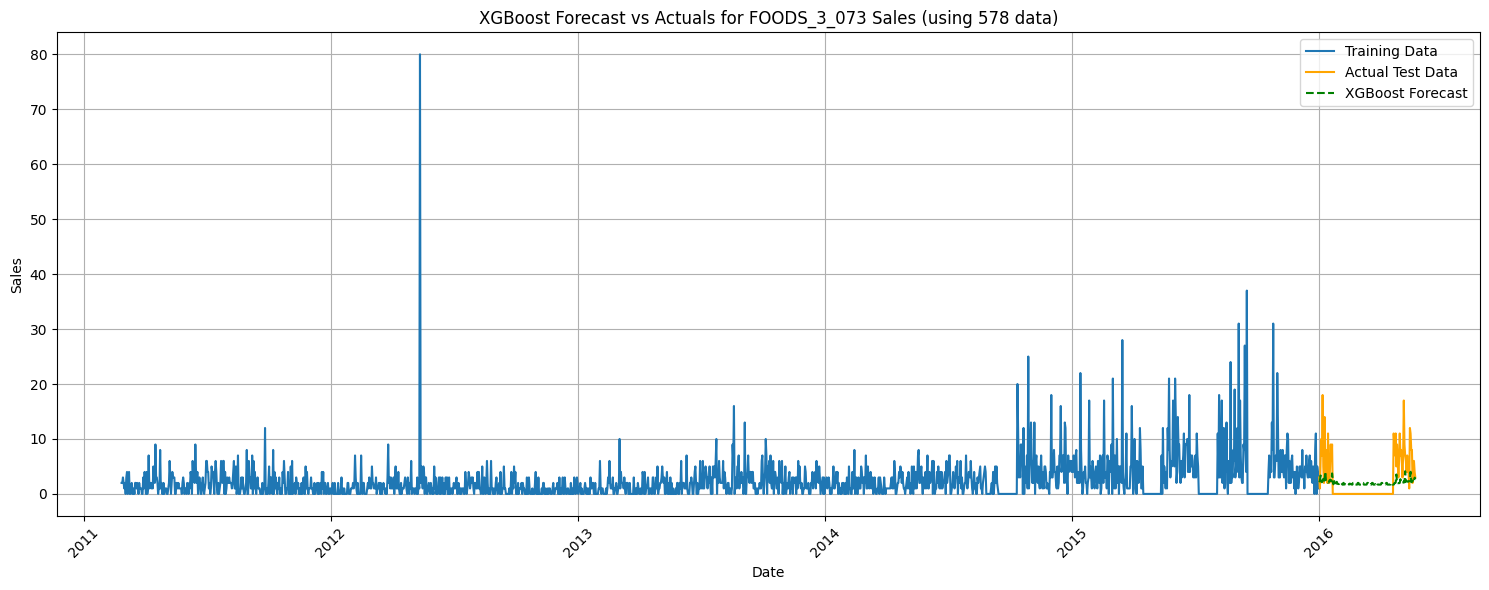


Evaluation Metrics for XGBoost Forecast:
Root Mean Squared Error (RMSE): 3.77
Mean Absolute Error (MAE): 2.81
Mean Absolute Percentage Error (MAPE) (excluding zeros): 59.07%
R2 Score: 0.09


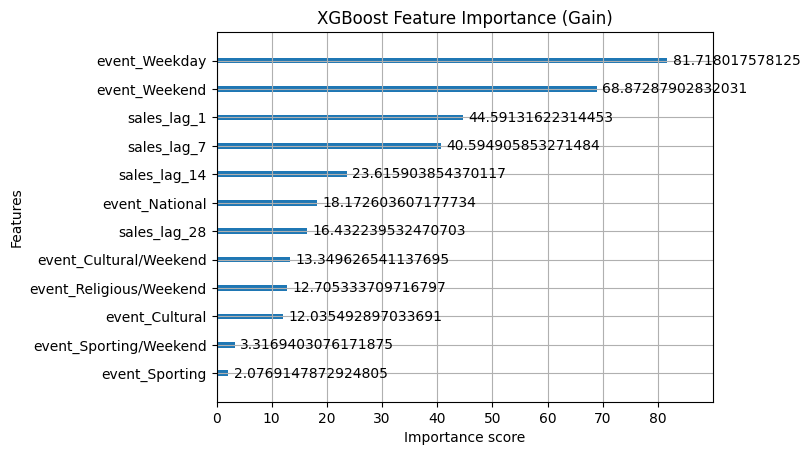

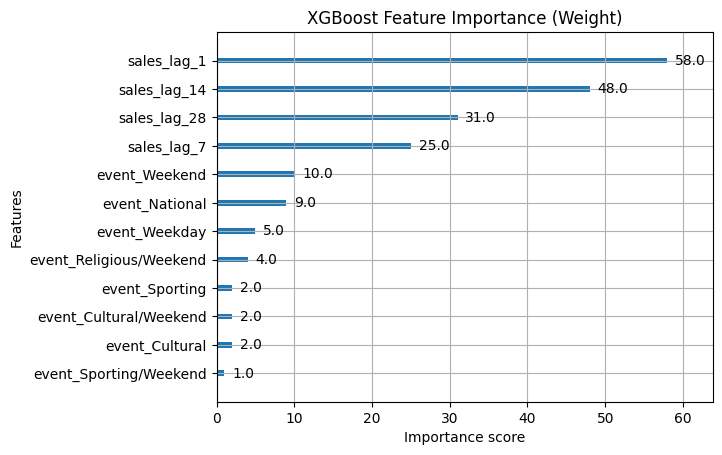

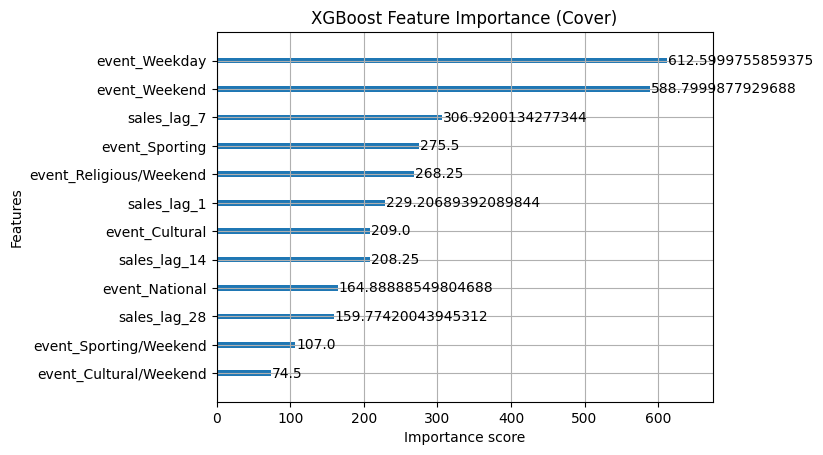

In [65]:
!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# We need to prepare the data for XGBoost.
# Features (X) will be the lag features and potentially other exogenous variables (like event dummies).
# Target (y) will be the 'sales' column.

# The DataFrame `item_food3_578_daily_ts_lagged` already has lag features and event dummies.
# Let's drop rows with NaNs that were introduced by lagging.
data_for_xgb = item_food3_578_daily_ts_lagged.dropna().copy()

# Define features (X) and target (y)
# Features include lag features and event dummies
features = [col for col in data_for_xgb.columns if col.startswith('sales_lag_') or col.startswith('event_')]
target = 'sales'

X = data_for_xgb[features]
y = data_for_xgb[target]

# Split data into training and testing sets
# Use a time-based split to respect the time series nature.

# The prepared data starts after the max lag, so the split point might be slightly later.
train_cutoff_date_xgb = '2015-12-31'

# Get the index location of the cutoff date in the data_for_xgb DataFrame
# Find the first date in data_for_xgb that is after the cutoff date
split_index = data_for_xgb.index.searchsorted(train_cutoff_date_xgb, side='right')

# Split the data
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(f"Training data shape for XGBoost: {X_train.shape}")
print(f"Testing data shape for XGBoost: {X_test.shape}")
print(f"First training date: {X_train.index.min()}")
print(f"Last training date: {X_train.index.max()}")
print(f"First testing date: {X_test.index.min()}")
print(f"Last testing date: {X_test.index.max()}")


# Initialize and train the XGBoost Regressor model
print("\nInitializing and training XGBoost Regressor model...")

# Define the model parameters (these can be tuned)
xgb_params = {
    'objective': 'reg:squarederror', # Objective for regression
    'n_estimators': 500,             # Number of boosting rounds
    'learning_rate': 0.05,           # Step size shrinkage
    'max_depth': 5,                  # Maximum tree depth
    'subsample': 0.7,                # Fraction of samples used for fitting the trees
    'colsample_bytree': 0.7,         # Fraction of columns used for fitting the trees
    'random_state': 42,              # Seed for reproducibility
    'n_jobs': -1,                    # Use all available cores
    'early_stopping_rounds': 50      # Stop if validation score doesn't improve
}

# Create the DMatrix for XGBoost (optimized data structure)
# It's good practice to use a validation set for early stopping
# Let's split the training data further for validation
X_train_model, X_val, y_train_model, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False, random_state=42
) # Use shuffle=False for time series

dtrain = xgb.DMatrix(X_train_model, label=y_train_model)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the model
model_xgb = xgb.train(
    xgb_params,
    dtrain,
    evals=[(dtrain, 'train'), (dval, 'eval')],
    verbose_eval=100 # Print evaluation metrics every 100 rounds
)

print("\nXGBoost model training complete.")

# Make predictions on the test set
print("\nMaking predictions with XGBoost...")
xgb_predictions = model_xgb.predict(dtest)

print("XGBoost forecasting complete.")

# Create a DataFrame for predictions with the correct index
xgb_forecast_df = pd.DataFrame({'sales': xgb_predictions}, index=X_test.index)

print("\nXGBoost Forecast (first 5 rows):")
print(xgb_forecast_df.head())
print("...")
print("\nXGBoost Forecast (last 5 rows):")
print(xgb_forecast_df.tail())


# Plot the training data, actual test data, and forecast
plt.figure(figsize=(15, 6))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Actual Test Data', color='orange')
plt.plot(xgb_forecast_df.index, xgb_forecast_df['sales'], label='XGBoost Forecast', color='green', linestyle='--')

plt.title('XGBoost Forecast vs Actuals for FOODS_3_073 Sales (using 578 data)') # Adjusted title based on data used
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate evaluation metrics
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_forecast_df['sales']))
mae_xgb = mean_absolute_error(y_test, xgb_forecast_df['sales'])

print(f"\nEvaluation Metrics for XGBoost Forecast:")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")

# Calculate MAPE, handling cases where actual sales are zero
y_true_xgb_no_zeros = y_test[y_test != 0]
y_pred_xgb_corresponding = xgb_forecast_df['sales'][y_test != 0]

if len(y_true_xgb_no_zeros) > 0:
    mape_xgb = mean_absolute_percentage_error(y_true_xgb_no_zeros, y_pred_xgb_corresponding)
    print(f"Mean Absolute Percentage Error (MAPE) (excluding zeros): {mape_xgb:.2f}%")
else:
    print("Cannot calculate MAPE as there are no non-zero actual sales in the test set.")

# Calculate R2 score
r2_xgb = r2_score(y_test, xgb_forecast_df['sales'])
print(f"R2 Score: {r2_xgb:.2f}")

# You can also plot feature importances
xgb.plot_importance(model_xgb, importance_type='gain')
plt.title('XGBoost Feature Importance (Gain)')
plt.show()

xgb.plot_importance(model_xgb, importance_type='weight')
plt.title('XGBoost Feature Importance (Weight)')
plt.show()

xgb.plot_importance(model_xgb, importance_type='cover')
plt.title('XGBoost Feature Importance (Cover)')
plt.show()


In conclusion, the analysis revealed significant variability in sales and revenue across different food items within the CA_1 store's FOODS category. The ABC analysis, based on revenue contribution, effectively categorized items, highlighting that a small percentage of "A" items contribute to a large portion of the revenue, while a significant number of "C" items contribute minimally. The demand variability analysis, using the Coefficient of Variation, further identified "A" category items with high volatility, indicating they might require closer inventory management and more sophisticated forecasting techniques. Time series forecasting models like SARIMA and Prophet showed promising results for forecasting the sales of a high-volume, high-variability item ('FOODS_3_578'), demonstrating their potential for capturing seasonality and trend. XGBoost, utilizing lag features and event indicators, also provided reasonable forecasts, emphasizing the importance of recent historical sales and special events in predicting demand. These insights can inform targeted inventory strategies, marketing efforts, and improved forecasting models for specific item categories.